# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [636]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [637]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Importing the necessary library 

In [638]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
# importing the sklearn libraries
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# from scipy importing libraries
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score
## WARNING 
import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

In [639]:
df=pd.read_csv("stock_data.csv")
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [640]:
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

***Observation***
- The data has 340 rows and 15 columns 
- The has 7 float 4 int 4 object 
- There is no null in the data set 

In [641]:
data.describe(include="all").T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327937   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

***Obseravtion***
- The `Ticker Symbol` is the unique code of Security 
- The `Security` is also an unique containt
- The `GICS Sector` is having 11 unique values 
- The `GICS Sub Industr` is have 104 unique values 
- The `Current Price` is slight skewed towards right 
- The `Price change` has the negitive values and the max value is 55.05 which has outliers in the data 
- The `Volatility` is slightly skwed toward left 
- The `ROE` is skewed toward left and has outliers 
- The `Cash Ratio` is skewed toward left and has outliers 
- The `Net Cash Flow`,`Earnings Per Share`,`P/B Ratio`,`P/E Ratio` data very hight velocity changes 

### Checking for the null value

In [642]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [643]:
def histogram_boxplot(data,feature,kde=False,figsize=(15,10)):
    f,(ax_1,ax_2)=plt.subplots(2,1,figsize=figsize,sharex=True,gridspec_kw={'height_ratios':(0.25,0.15)})
    sns.boxplot(data,x=feature,ax=ax_1,showmeans=True,color="red")
    sns.histplot(data,x=feature,ax=ax_2,color="blue",kde=kde)
    ax_1.axvline(data[feature].median(),color="yellow")
    ax_2.axvline(data[feature].median(),color="green")

In [644]:
def labeled_plot(data,feature,perc=True,n=None):
    count=data[feature].nunique()
    total=len(data[feature])
    if n is None:
        plt.figure(figsize=(count+2,6))
    else:
        plt.figure(figsize=(n+2,6))
    plt.xticks(rotation=90)
    ax=sns.countplot(data=data,x=feature,palette="Paired",order=data[feature].value_counts().index[:n])
    
    for p in ax.patches:
        if perc is True:
            label="{0:.2f}%".format(100*p.get_height()/total)
        else:
            label=p.get_height()
        x=p.get_x()+p.get_width()/2
        y=p.get_height()
        plt.annotate(
        label,
        (x,y),
        ha="center",
        va="center",
        xytext=(0,5),
        textcoords="offset points")

***1. What does the distribution of stock prices look like?***

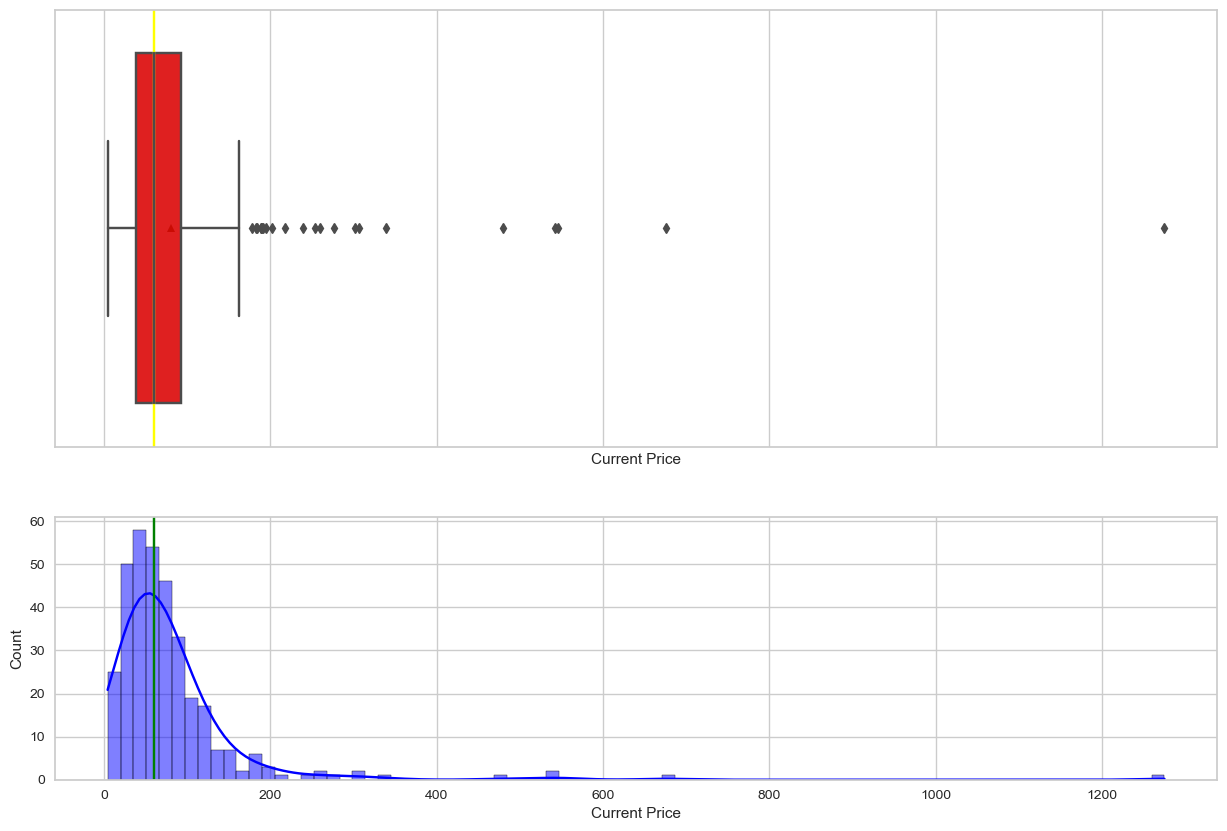

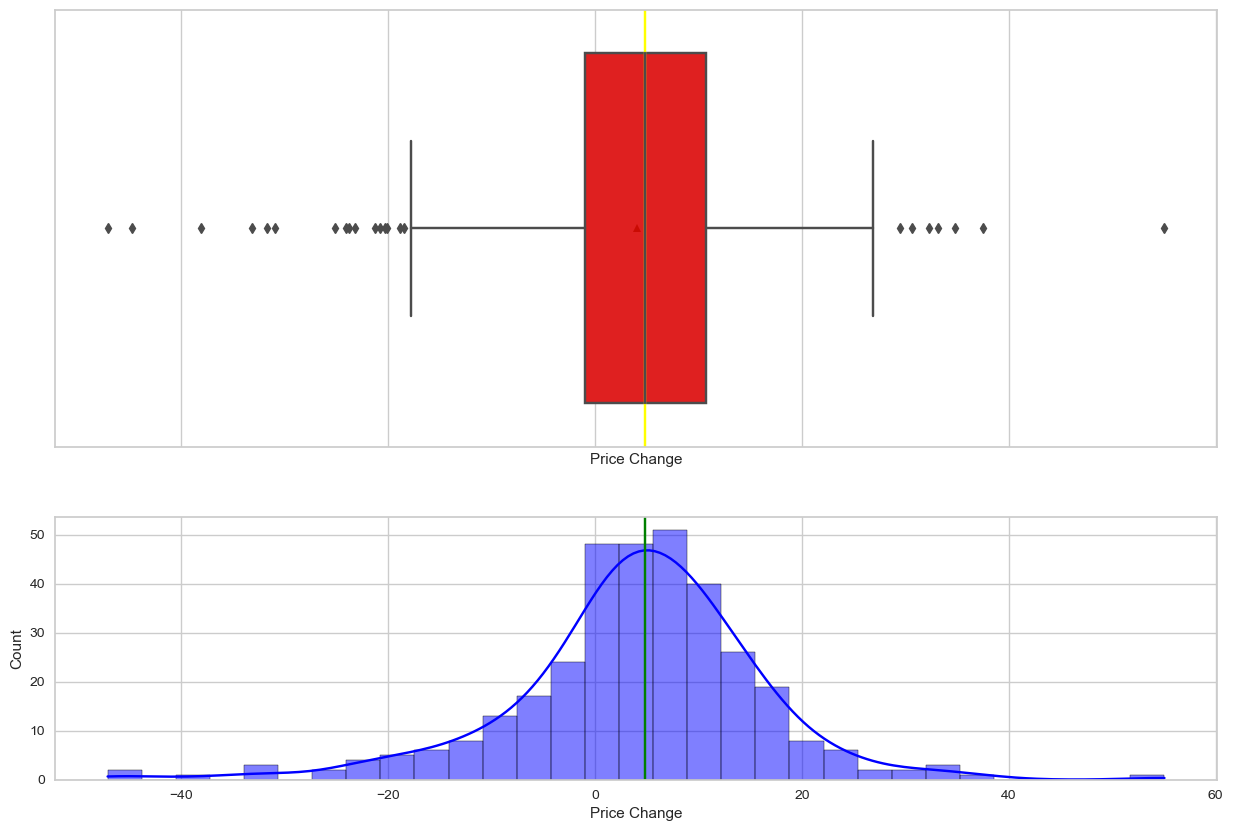

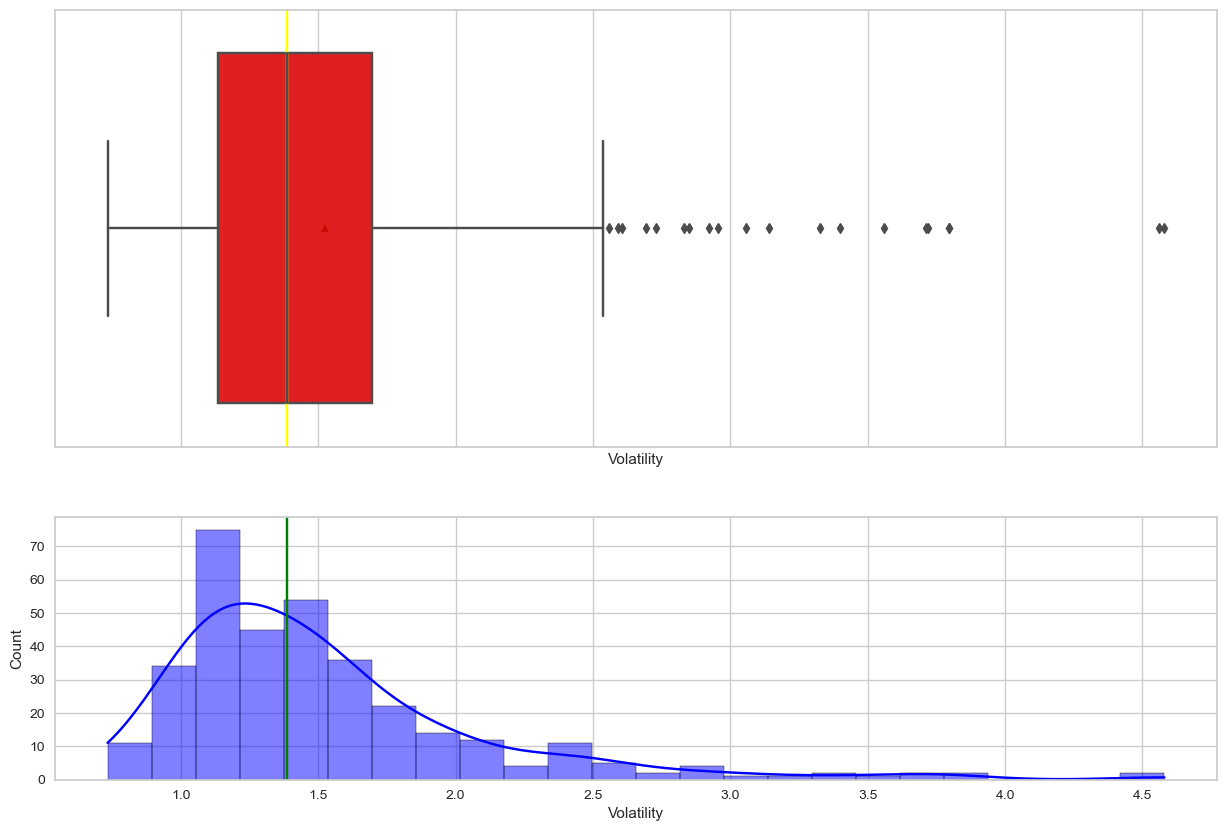

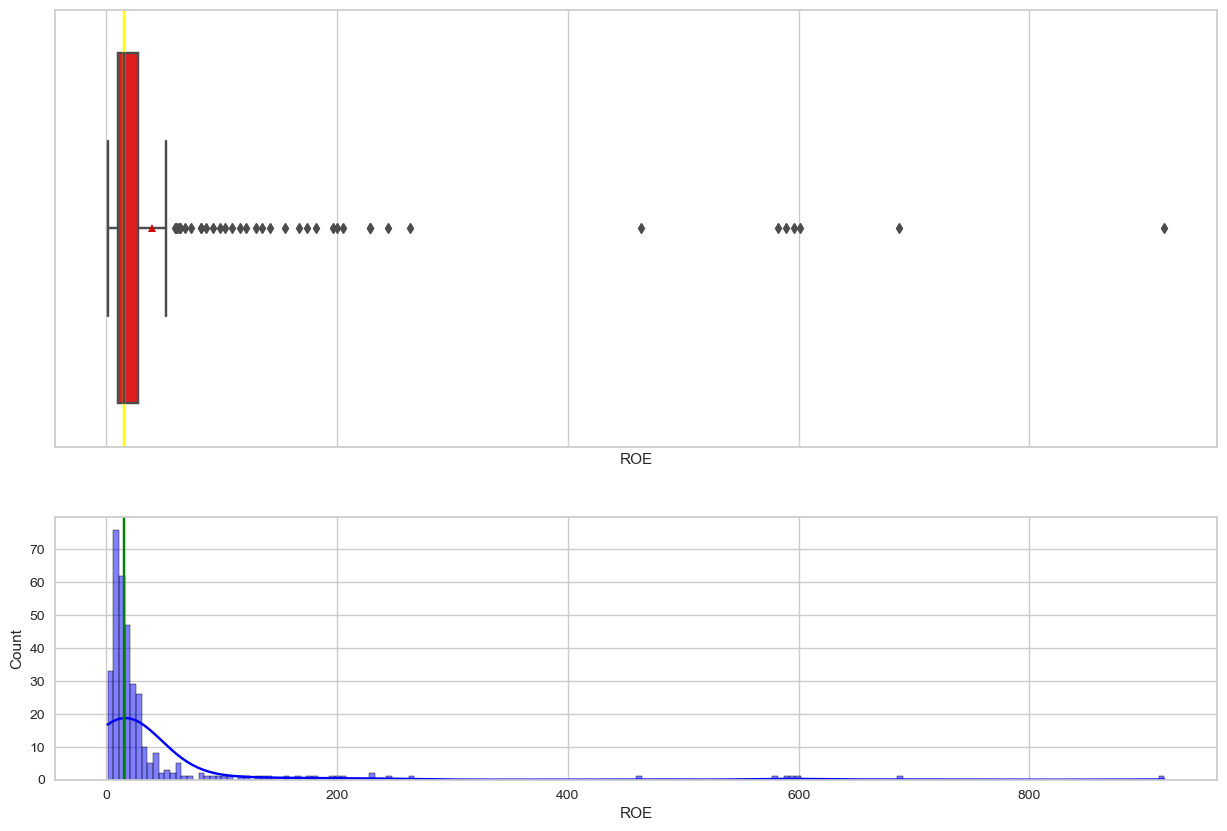

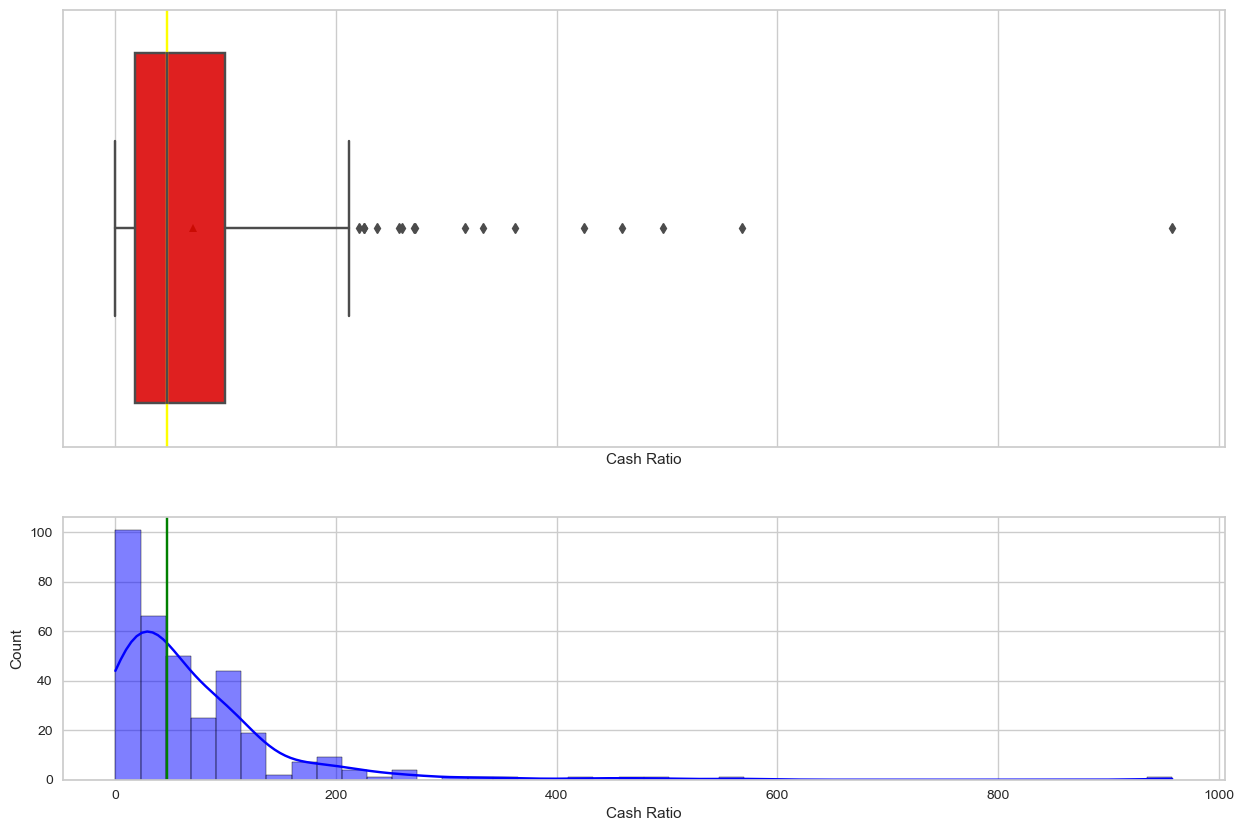

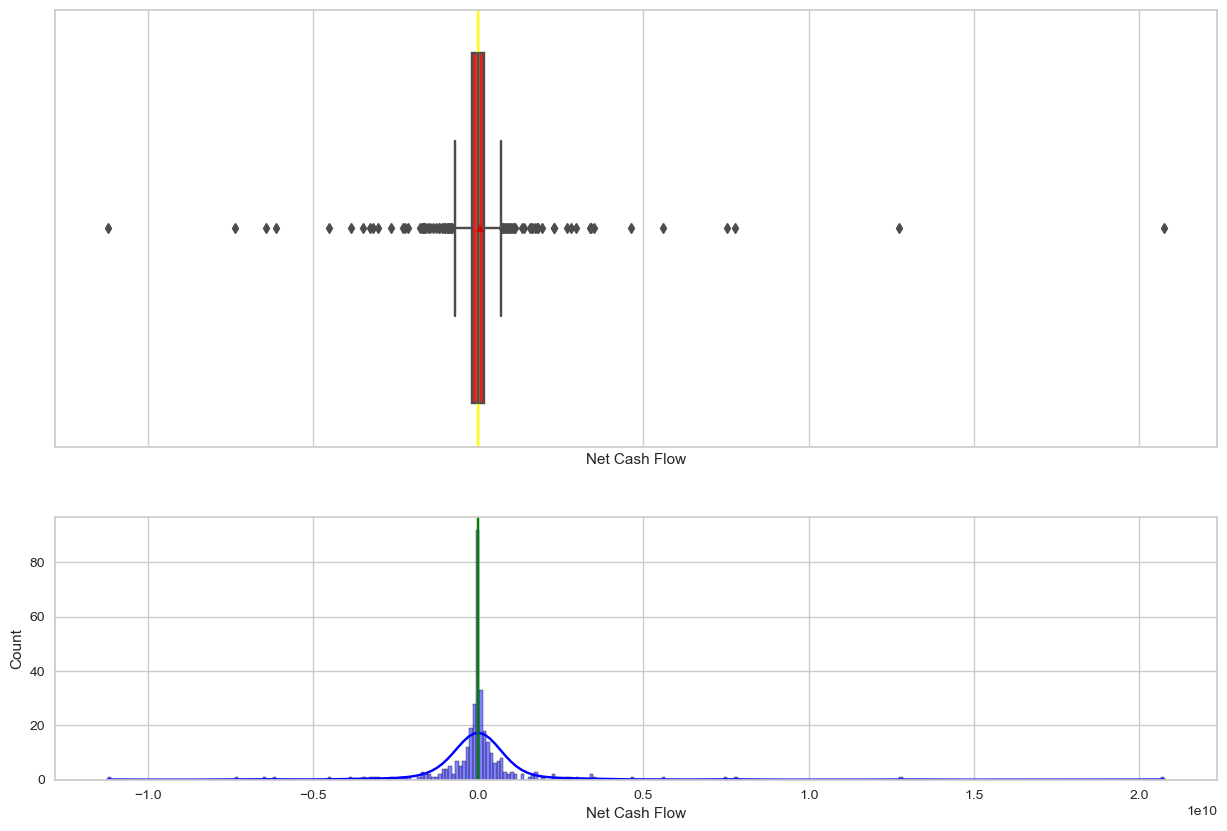

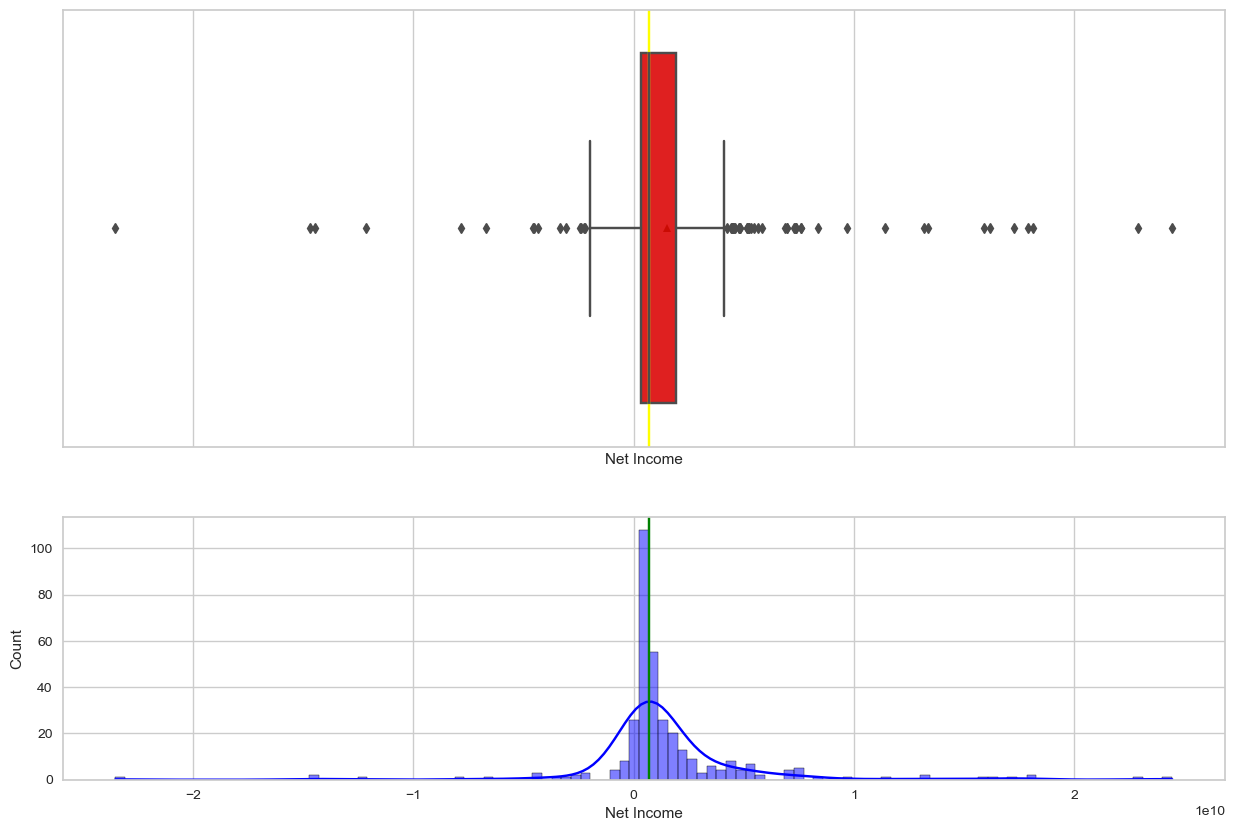

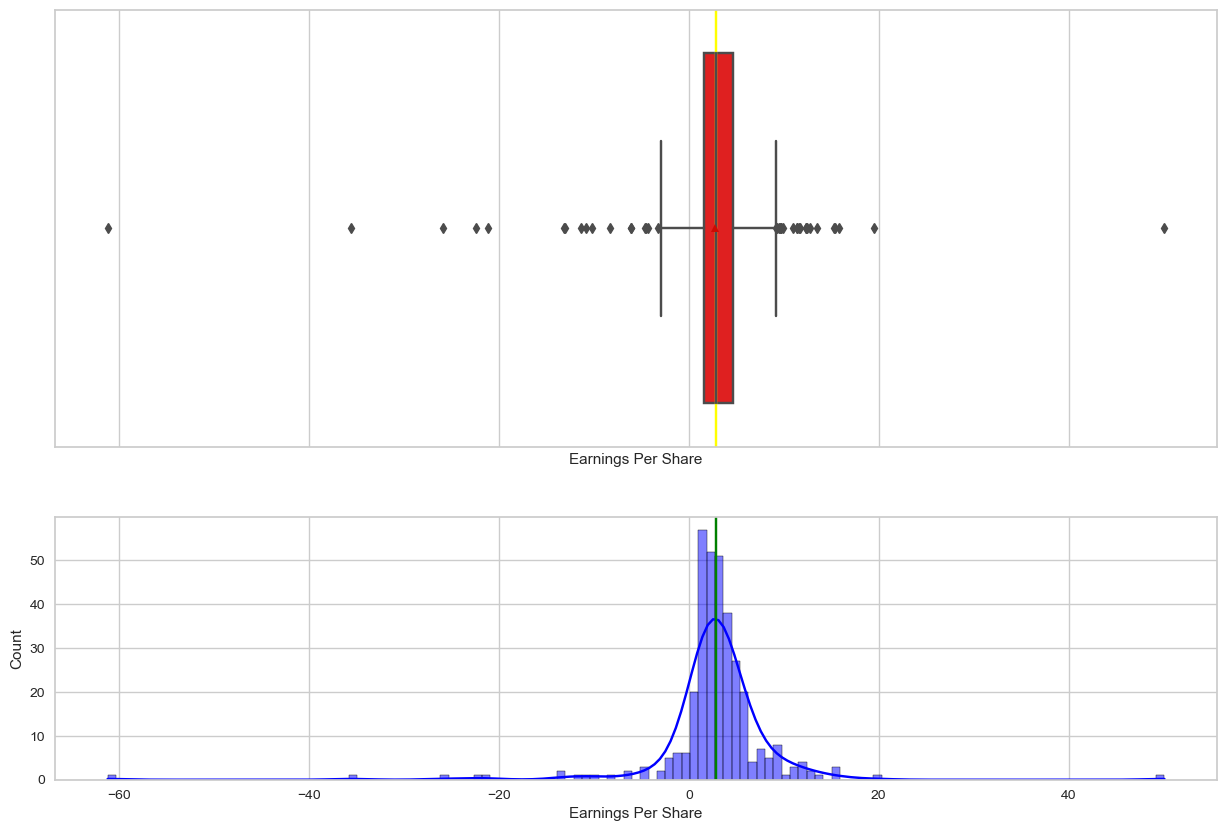

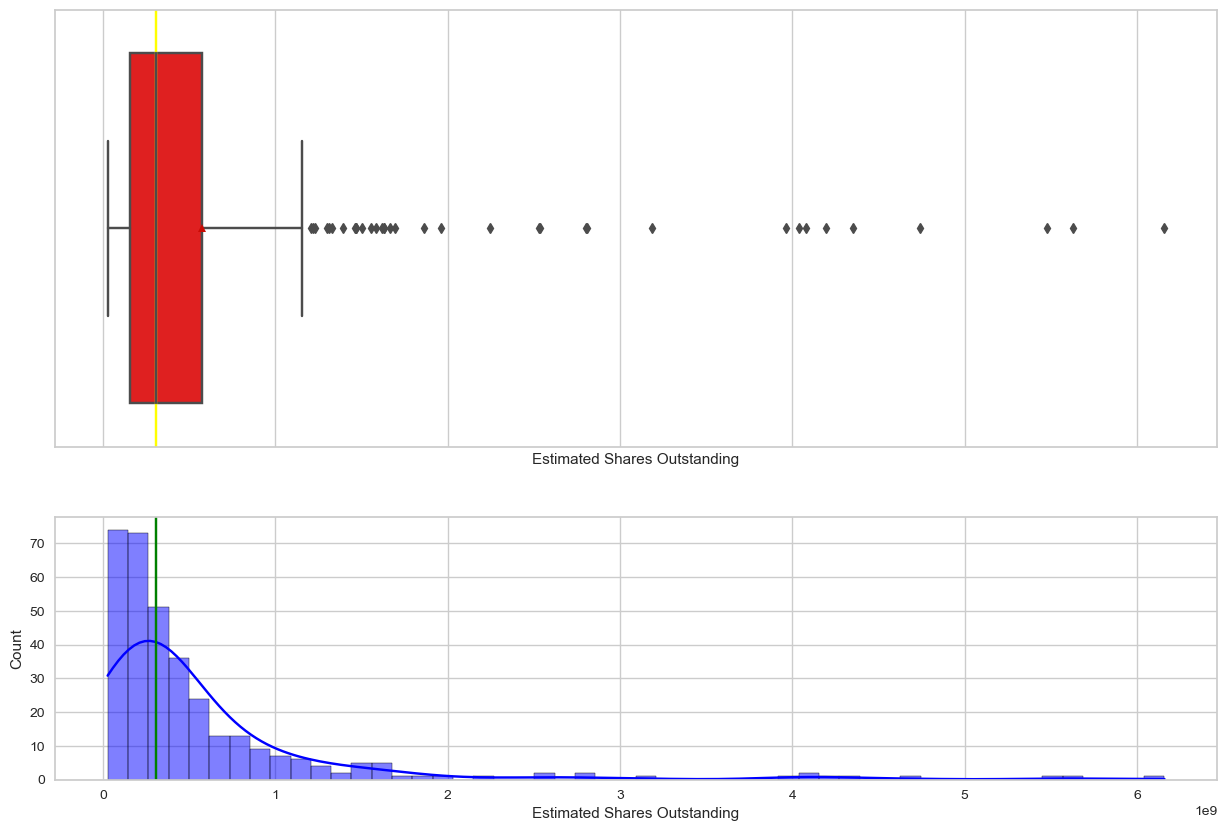

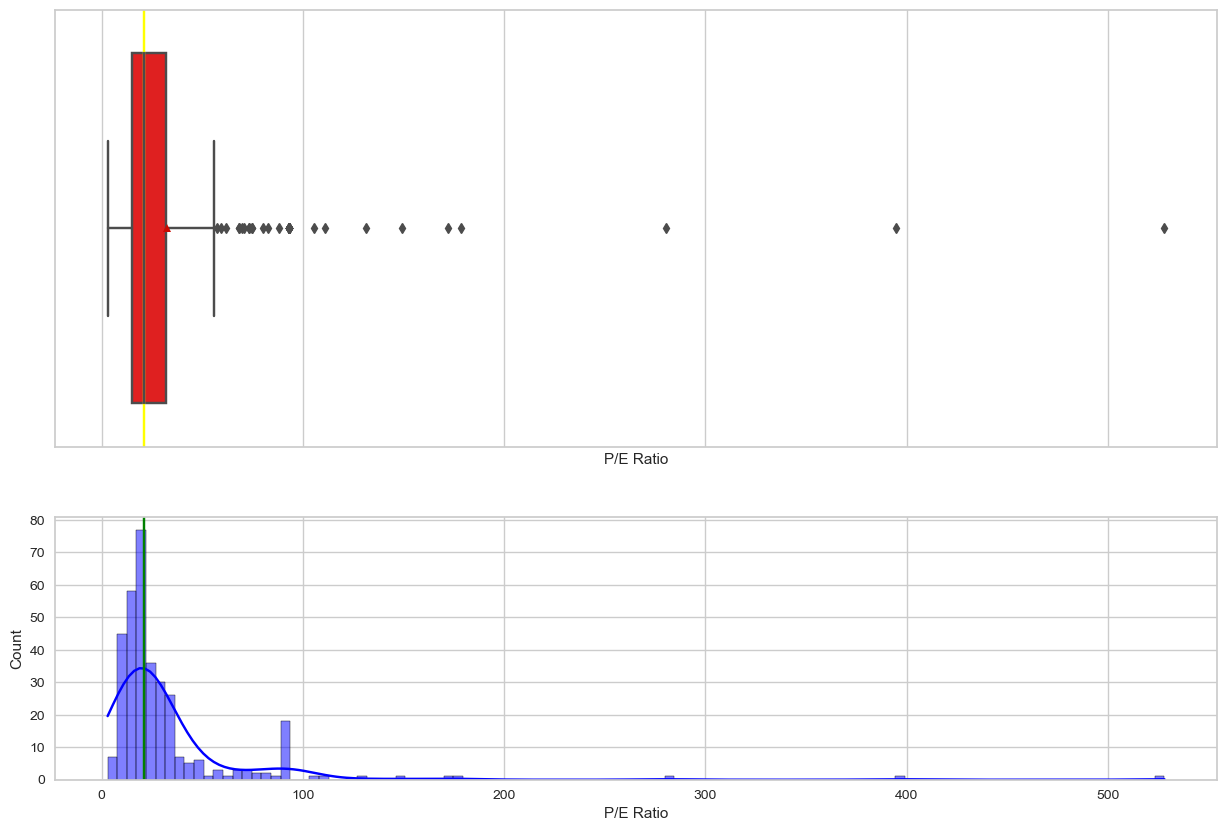

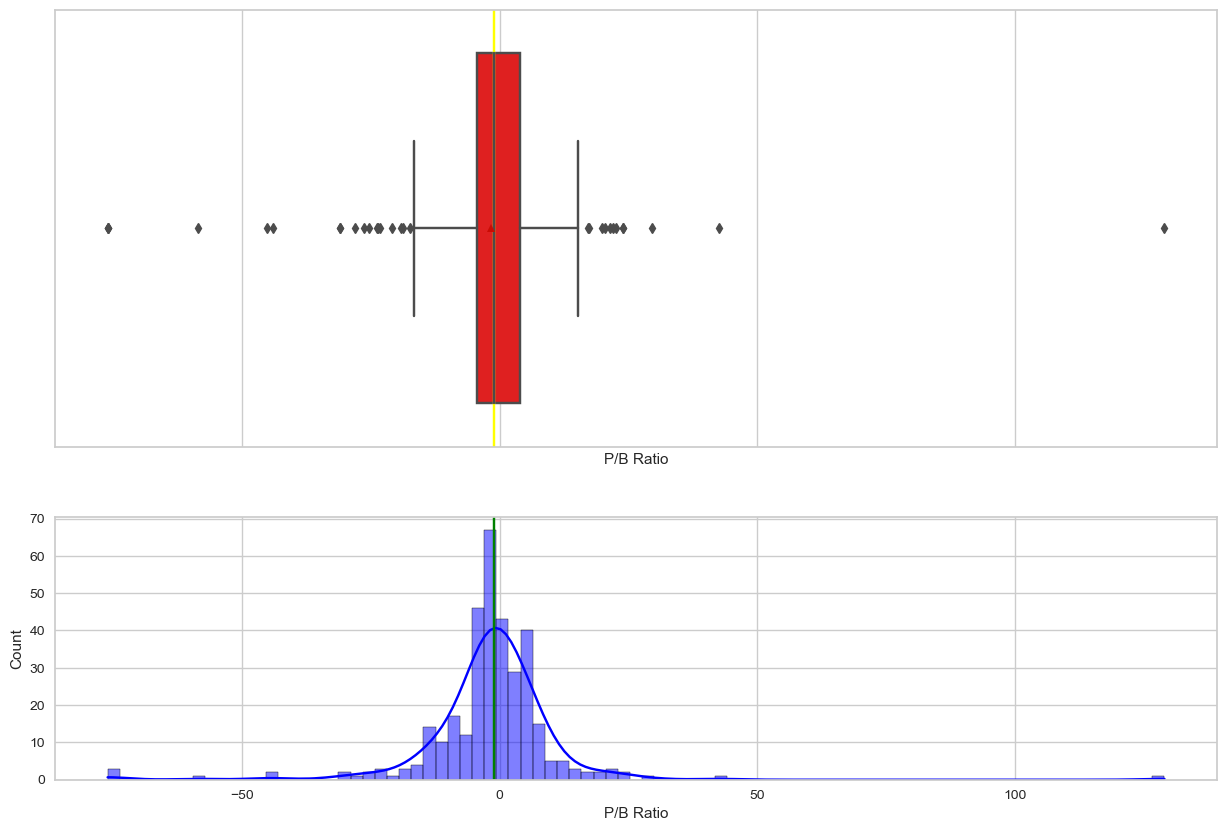

In [645]:
num_col=data.select_dtypes(exclude=np.object_).columns
for i in num_col:
    histogram_boxplot(data,i,kde=True)

In [646]:
num_col

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

***Observation***
- `Current Price` is right skewed and the data has the outliers in upper whisker
- `Price Change` this is 13 weeks price change. There are some stock which has heavy downfall and heavy incremental 
- `Volatility` There are some stocks with high volatility
- `ROE`A measure of financial performance calculated by dividing net income by shareholders' equity has more outliers in upper whiskers
- `Cash Ratio`,
       `Net Cash Flow`, `Net Income`, `Earnings Per Share`,
       `Estimated Shares Outstanding`, `P/E Ratio`, `P/B Ratio` have more outliers in the data 

## Categorical variable 

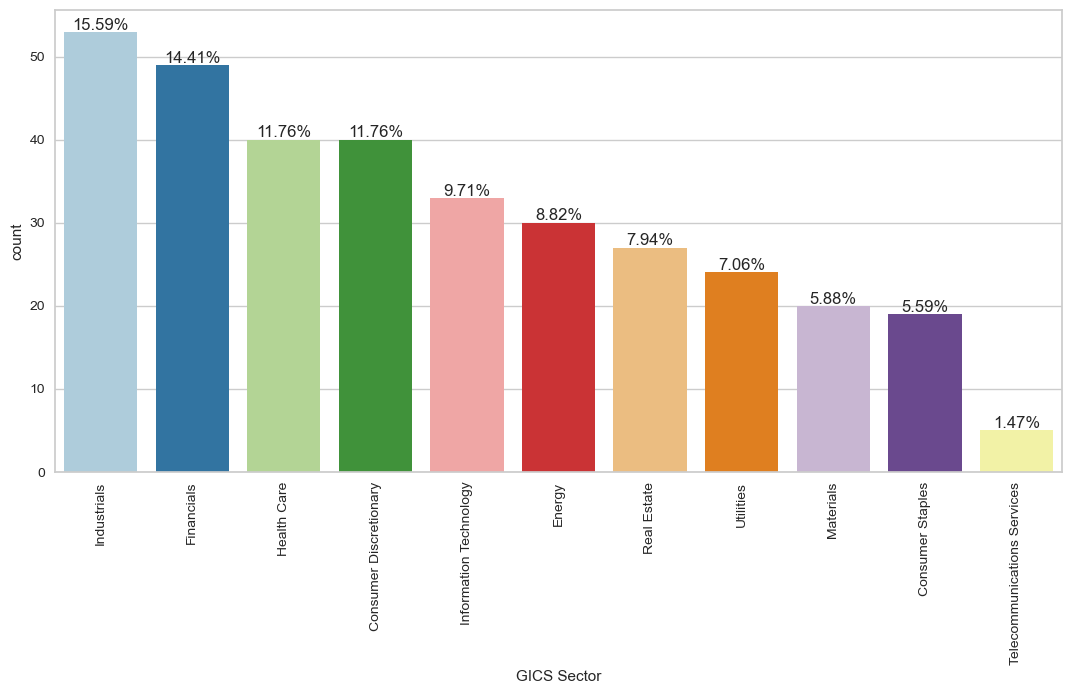

In [647]:
labeled_plot(data,"GICS Sector",perc=True)

***Obswrvation***
- The industrials has the highest GICS Sector with 15.59% and followed by financials
- the telcecommunication is the lowerst in the data 1.47 

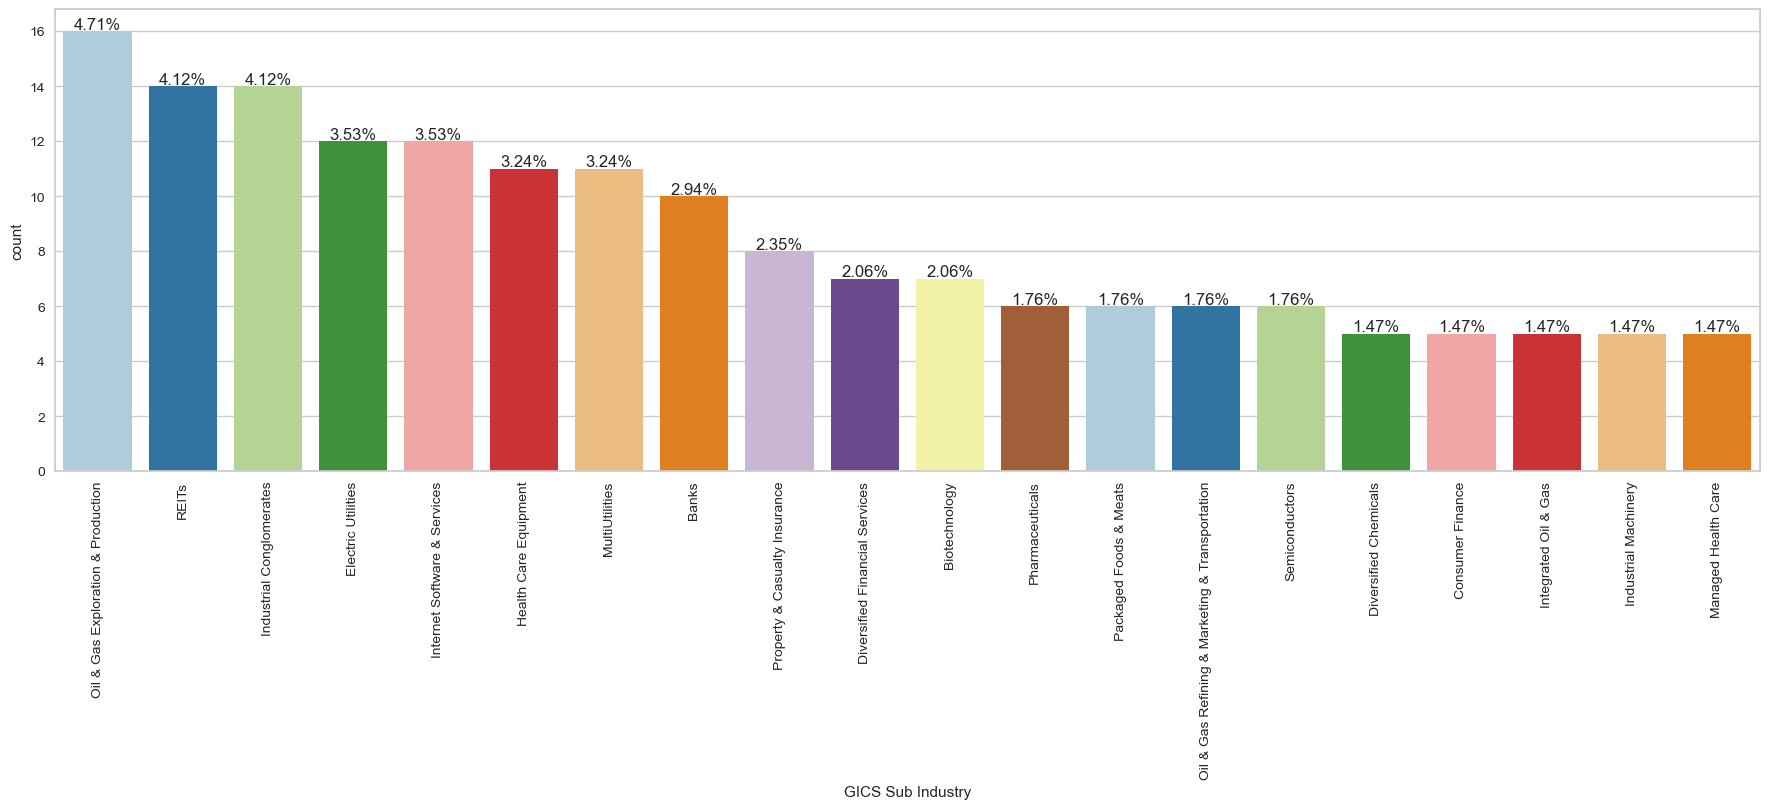

In [648]:
labeled_plot(data,"GICS Sub Industry",perc=True,n=20)

***2. The stocks of which economic sector have seen the maximum price increase on average?***
- ***P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?***
- ***Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?***

### Bi-varient Analysis ("GICS Sector" vs Numerical value)

<Figure size 200x600 with 0 Axes>

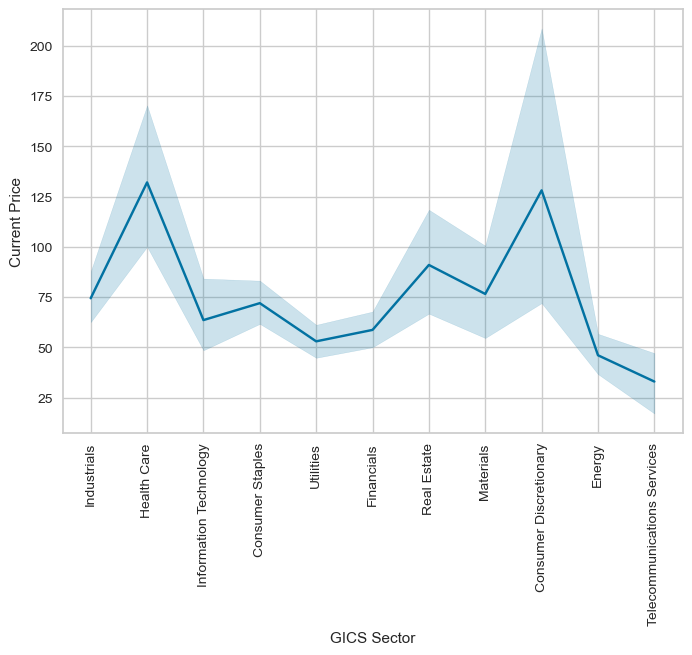

<Figure size 300x600 with 0 Axes>

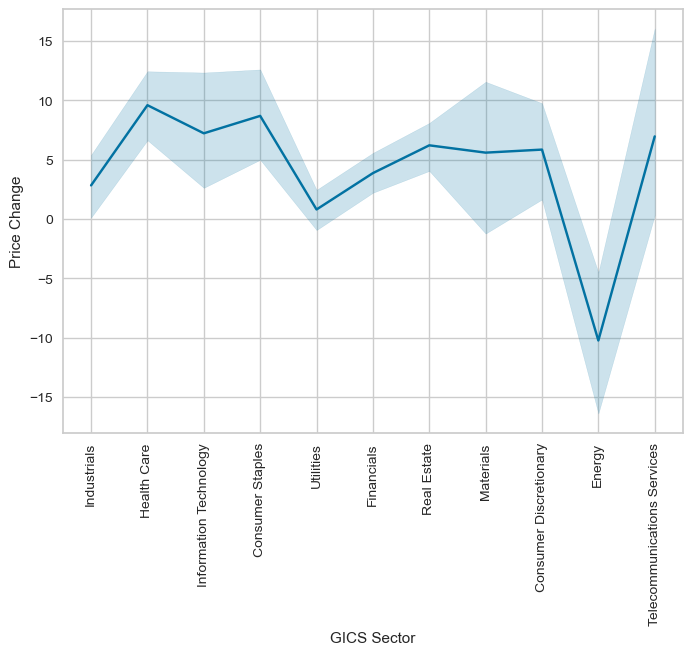

<Figure size 400x600 with 0 Axes>

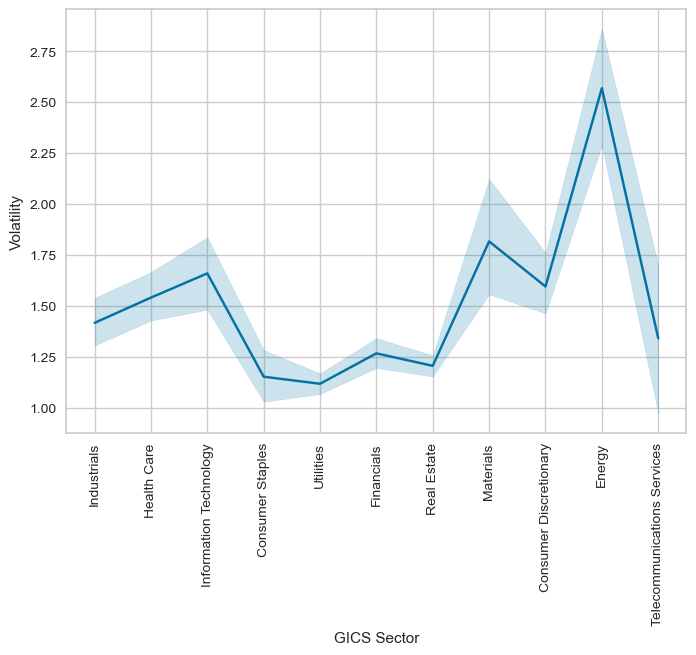

<Figure size 500x600 with 0 Axes>

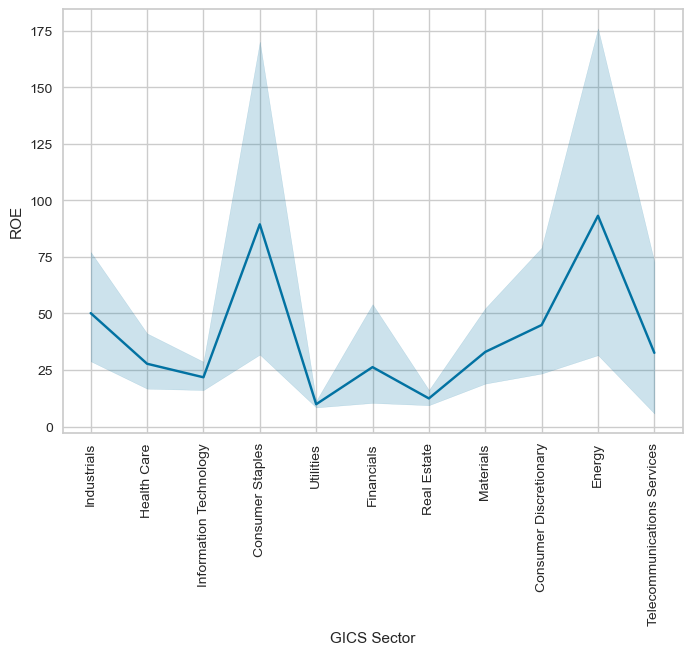

<Figure size 600x600 with 0 Axes>

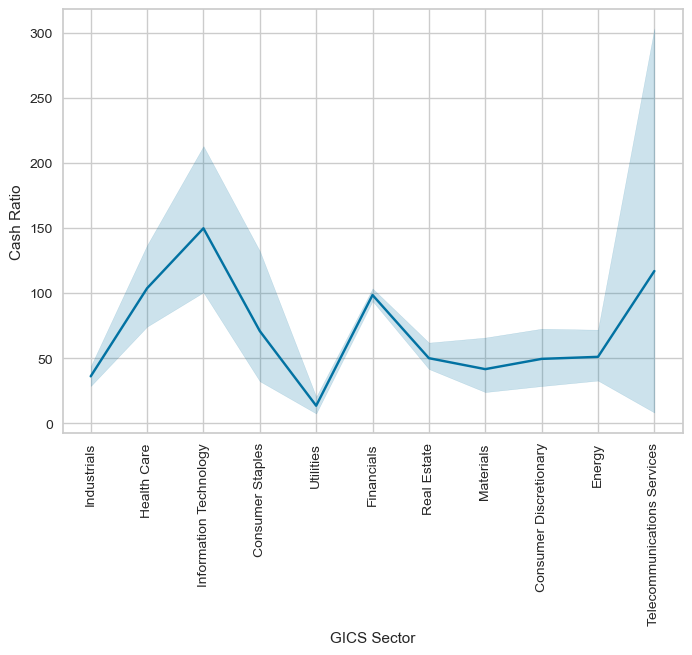

<Figure size 700x600 with 0 Axes>

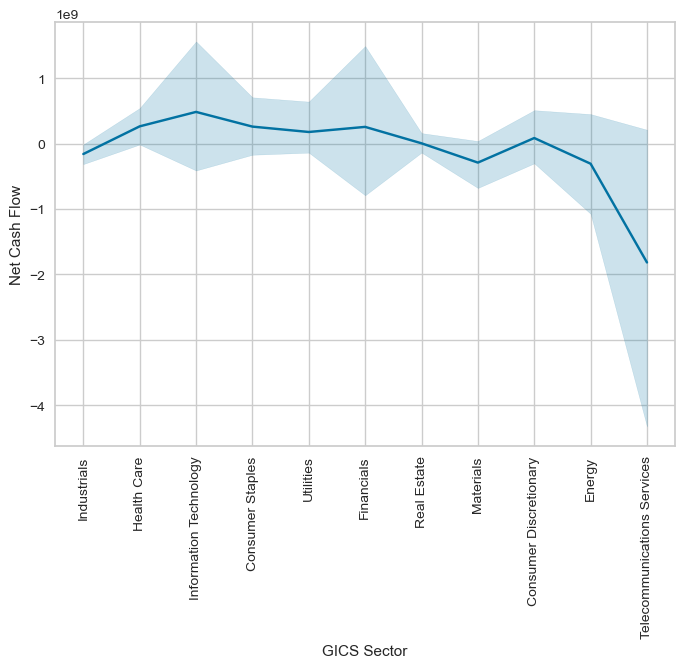

<Figure size 800x600 with 0 Axes>

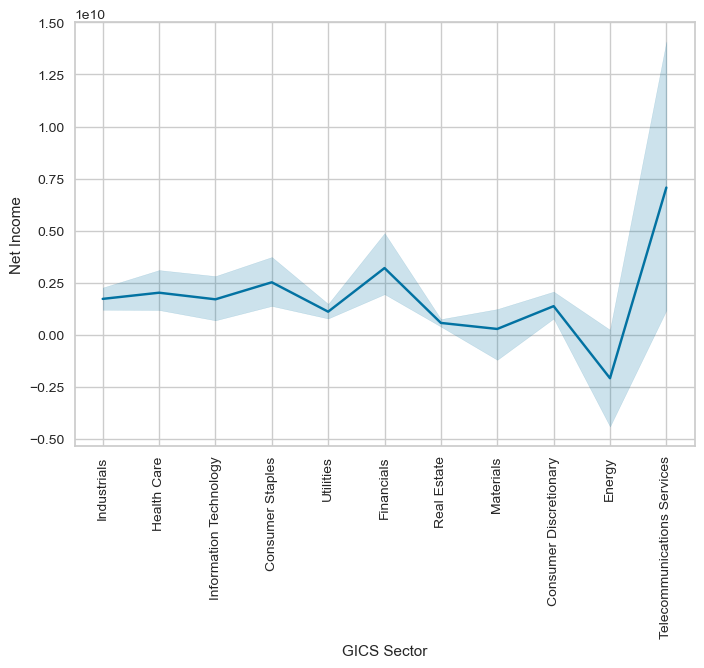

<Figure size 900x600 with 0 Axes>

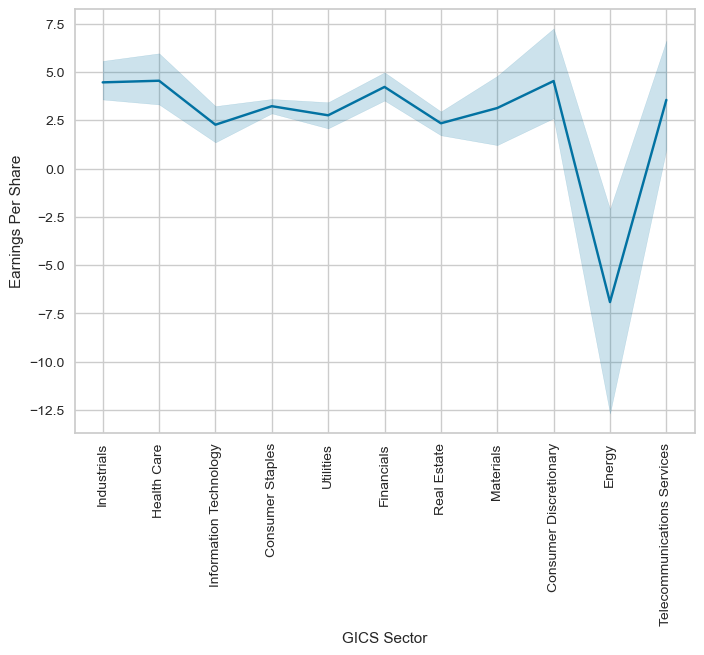

<Figure size 1000x600 with 0 Axes>

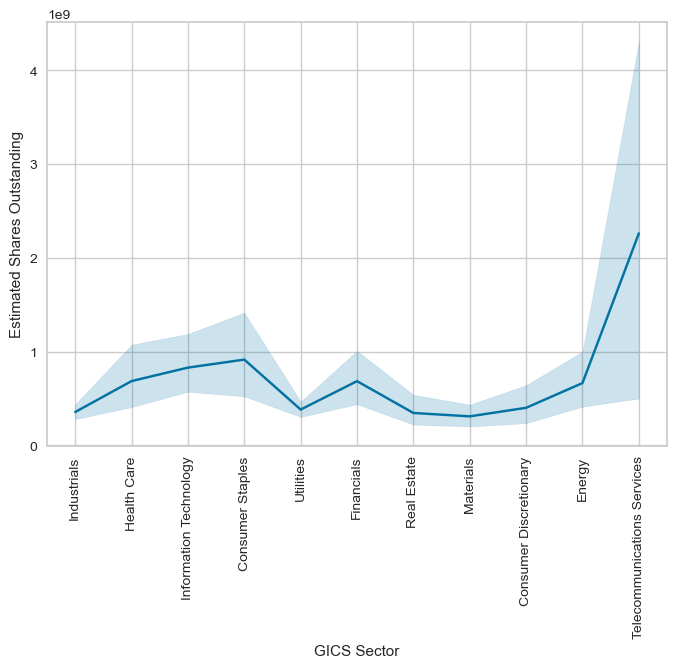

<Figure size 1100x600 with 0 Axes>

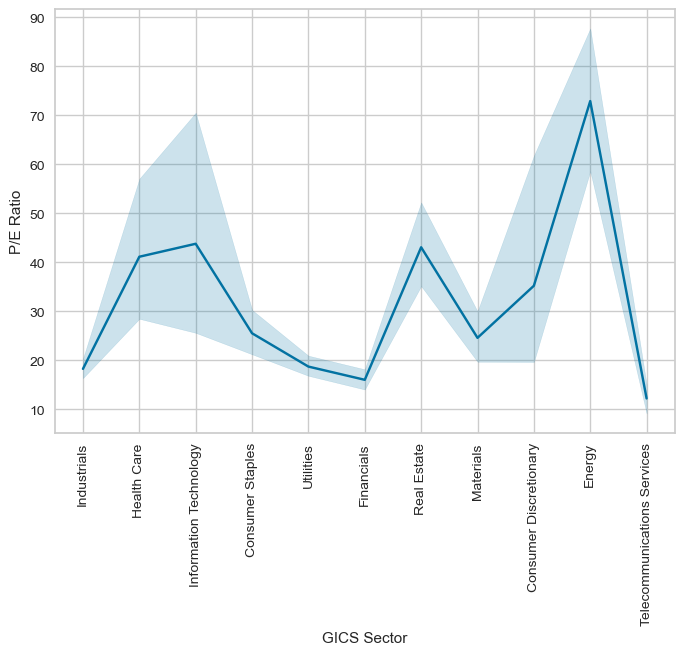

<Figure size 1200x600 with 0 Axes>

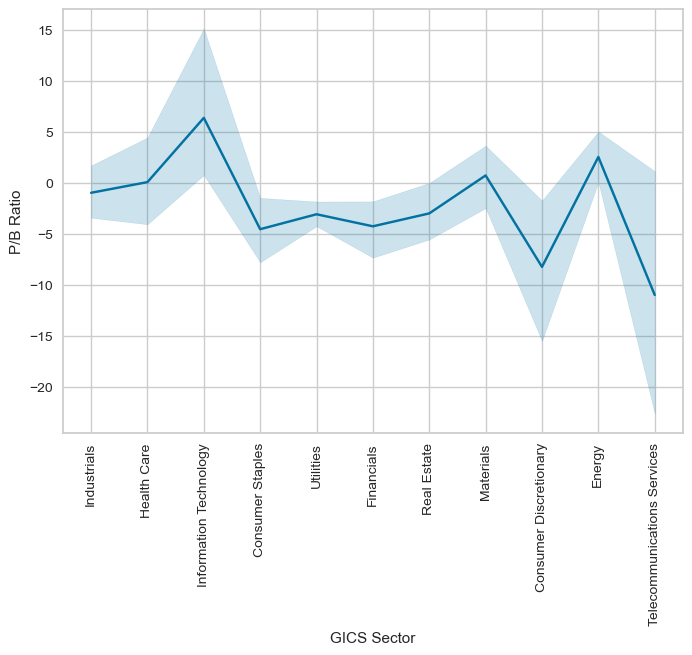

In [649]:

for i,val in enumerate (num_col):
    plt.figure(figsize=(i+2,6))
    f,(ax)=plt.subplots(1,1,sharex=True,)
    ax=sns.lineplot(data,x="GICS Sector",y=val)
    plt.xticks(rotation=90)
    

***Observation***
- `Current-price vs GICS Sector ` Healthcare and consumer Discretionary has Uptrend compared to other 
- `Price change vs GICS Sector` Energy has downtrend comapring to other sectors 
- `Volatility vs GICS Sector` The Energy stocks has more volatility 
- `Roe vs GICS Sector`Energy and consumer Staples has more financial performance calculated
- `cash ration vs GICS Sector` informatio Technology has more cash flow 
- `net cash flow vs GICS Sector` the telecommunication has less clash flow remaining has the balanced trend 
- `net income vs GICS Sector` The telecommunication has highest net income 
- `earnings per share vs GICS Sector` - the energy stocks less earning per stock 
- `estimated share outstanding` the telcome has the highest outstanding because of high netincome
- `p/bratio vs p/eratio vs GICS Sector`- the trends are slightly similar but infomational has slightly differnt 

## Heat map for the correlation
***3. How are the different variables correlated with each other?***

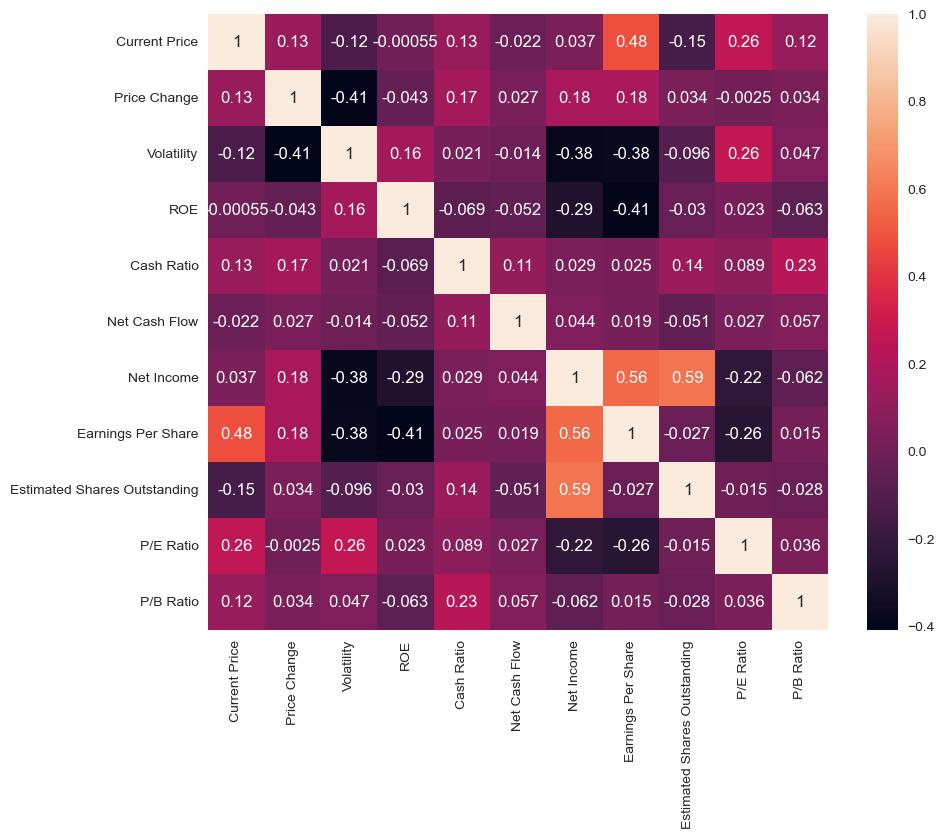

In [650]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True),cbar=True,annot=True);

***Observation***
- The netcashflow has positive relation with earings per share and estimated shares outstanding
- Even the earning per share and current price has the positive relation
- From the Heatmap we are not getting the exact corelation 

<Figure size 2000x1500 with 0 Axes>

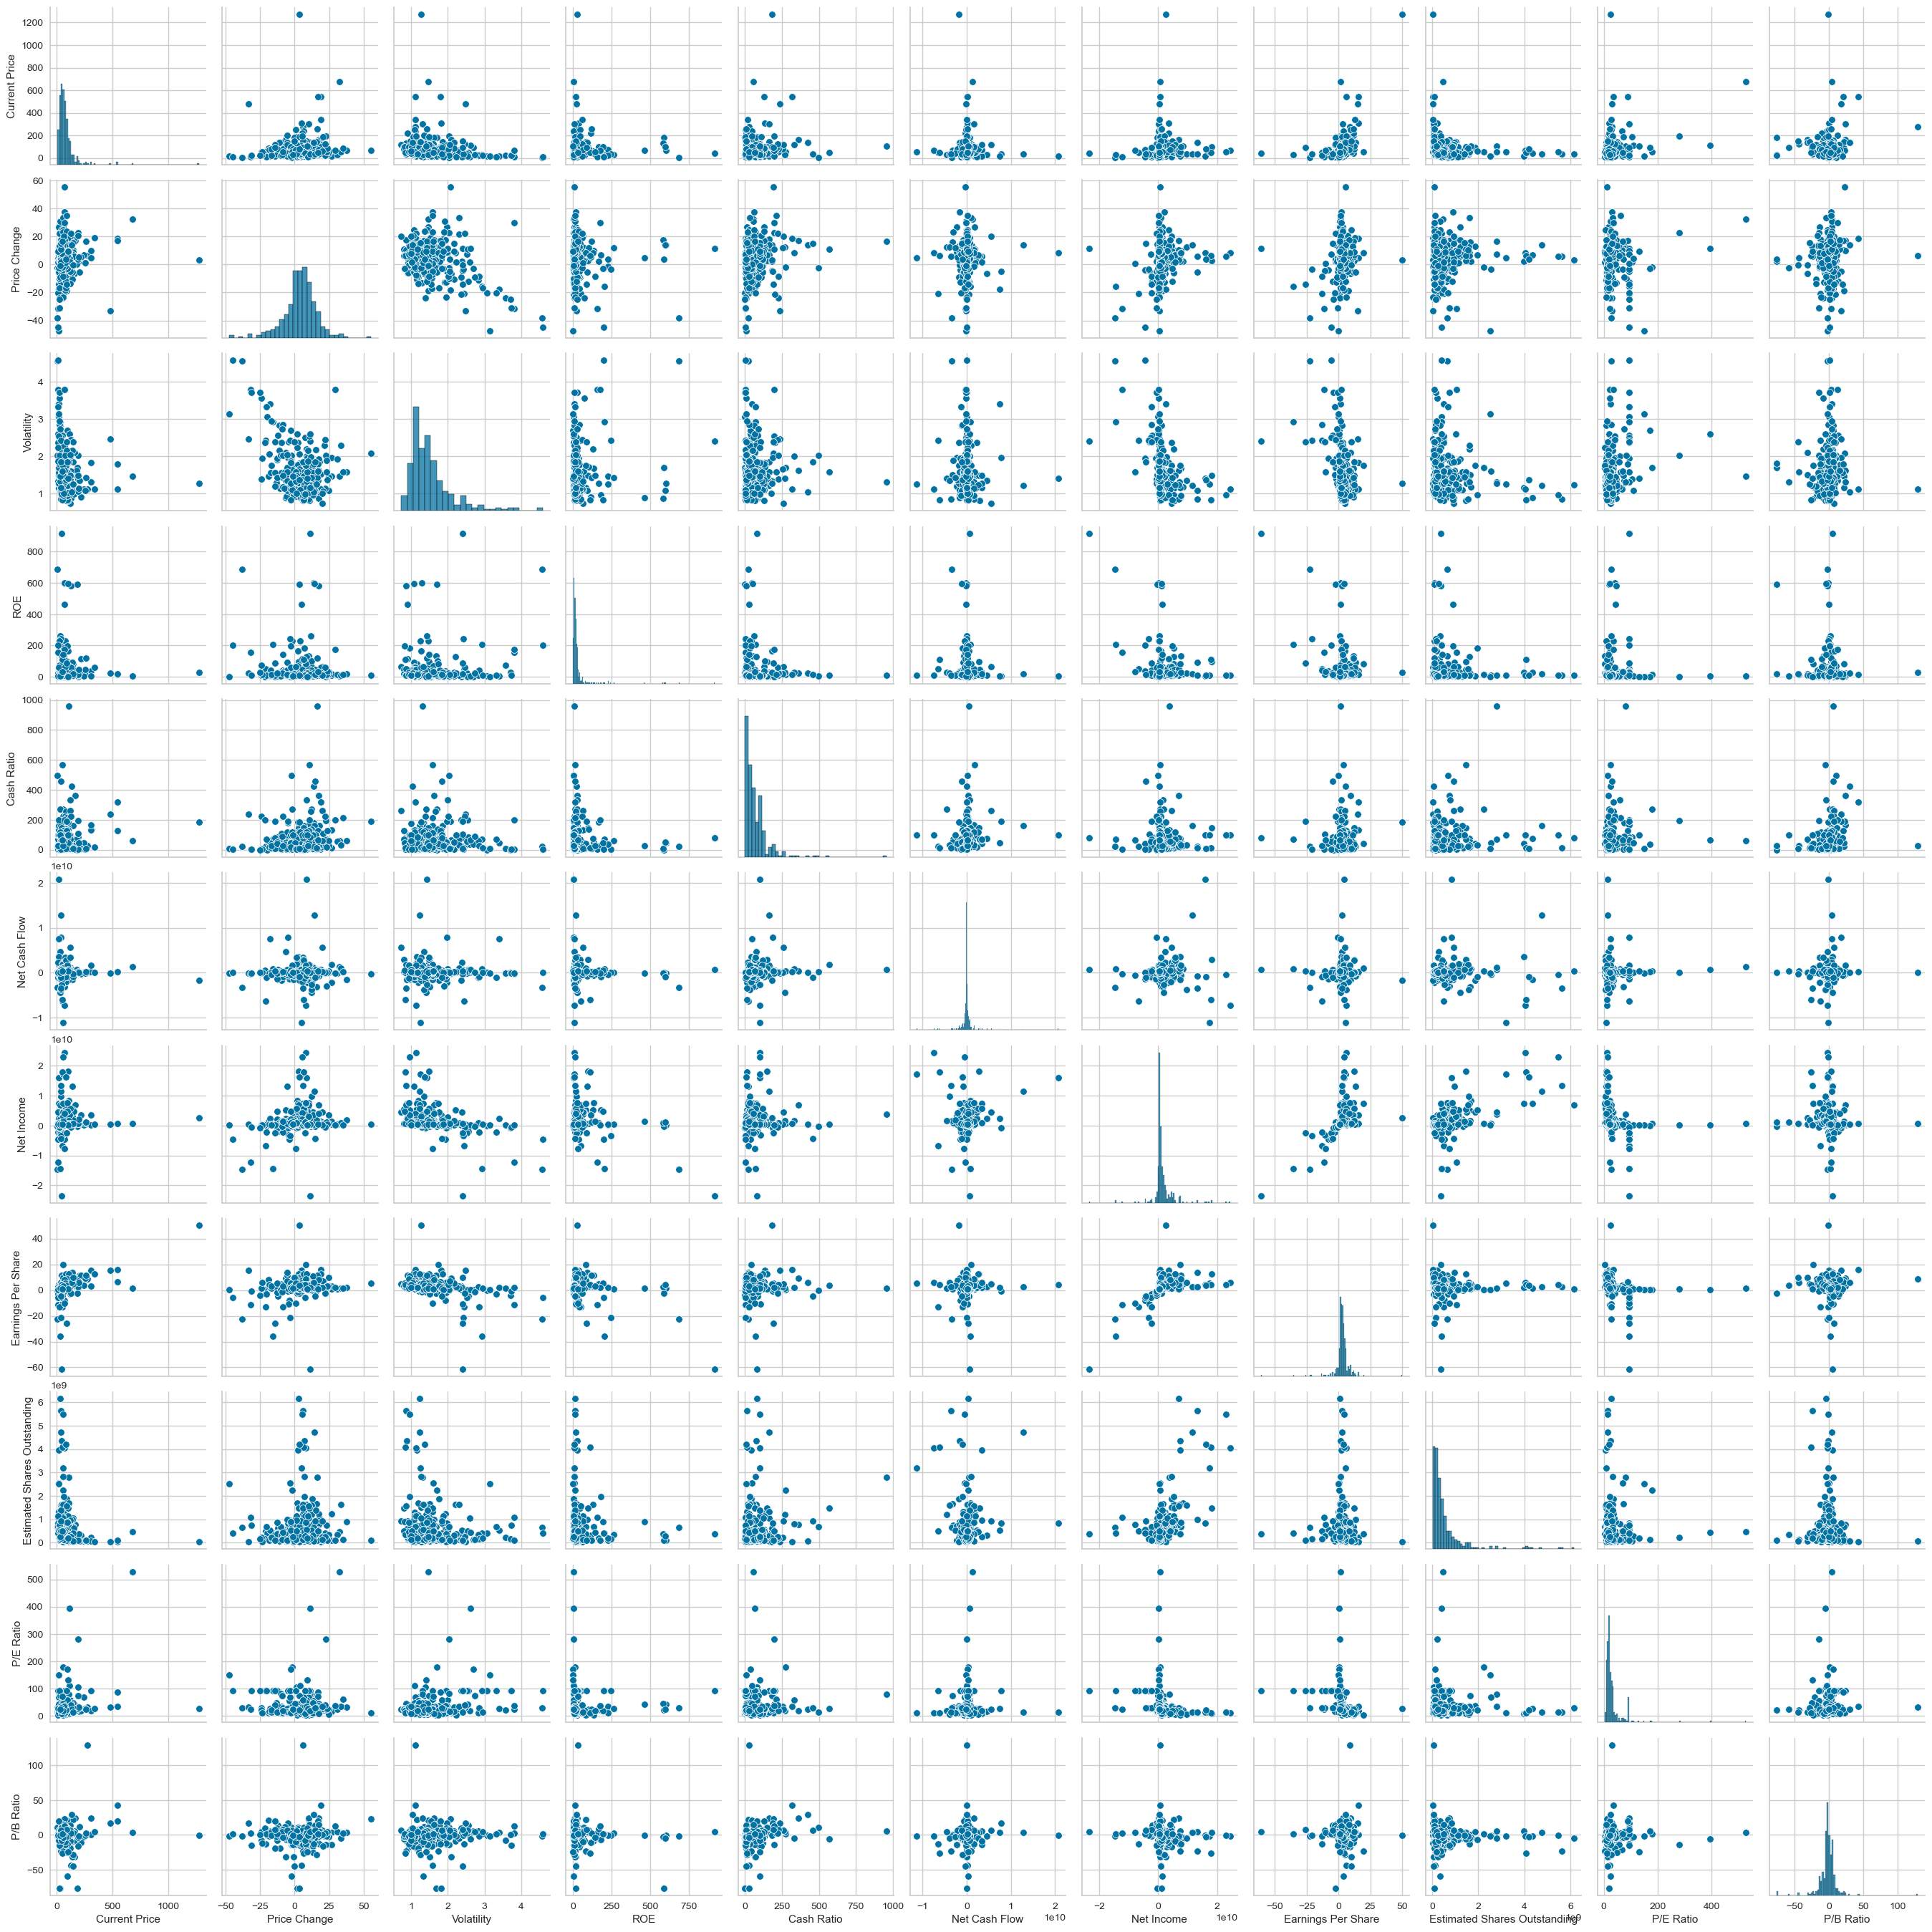

In [651]:
plt.figure(figsize=(20,15))
sns.pairplot(data)

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [652]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

***Observation***
- we don't see any null in the data 

In [653]:
data.duplicated().sum()


0

***Observation***
- There is no Dulicate in the data 

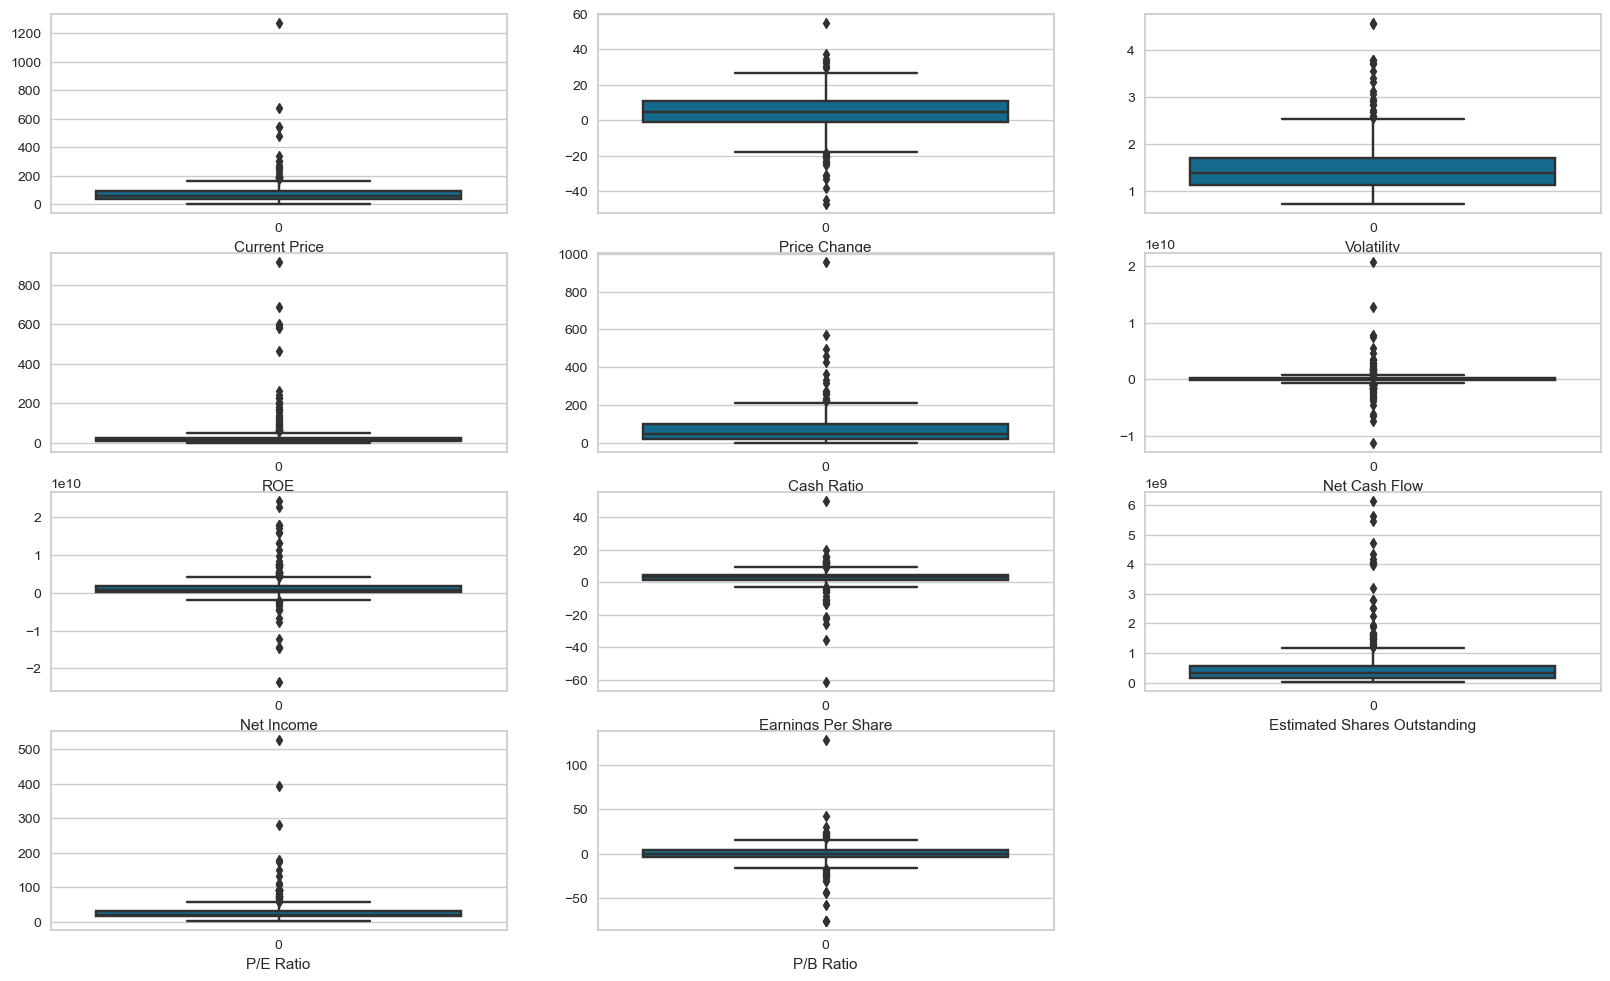

In [654]:
# checking for the outliers 
plt.figure(figsize=(20,15))
for i,val in enumerate (num_col):
    plt.subplot(5,3,i+1)
    sns.boxplot(data[val])
    plt.xlabel(val)

***Observation***
- The Numerical data has Outliers. Currently we are doing the clustering so K-MEAN is sensitive with outliers so we will treat the outliers.
- Reducing noise and outliers in cluster analysis can be achieved by performing outlier detection and removal before or after clustering.

In [655]:
# treating the outliers 
def Treating_outlier(data,col):
    for i in col:
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        lower_whisker=q1- 1.5*iqr
        upper_whisker=q3-1.5*iqr
        df[i]=np.clip(df[i],lower_whisker,upper_whisker)
        return df

In [656]:
Treating_outlier(data,num_col)

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines      11.392499      9.999995    1.687151   
1                 Pharmaceuticals      11.392499      8.339433    2.197887   
2           Health Care Equipment      11.392499     11.301121    1.273646   
3            Application Software      11.392499     13.977195    1.357679   
4                  Semiconductors      11.392499     -1.827858    1.701169   
..                            ...            ...           ...         ...   
335  Internet Software & Services      11.392499     14.887727    1.845149   
336                   Restaurants      11.392499     -8.698917    1.478877   
337         Health Care Equipment      11.392499      9.347683    1.404206   
338                Regional Banks      11.392499     -1.158588    1.468176   
339               Pharmaceuticals      11.392499     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    135          51     -604000000  7610000000               11.39   
1    130          77       51000000  5144000000                3.15   
2     21          67      938000000  4423000000                2.94   
3      9         180     -240840000   629551000                1.26   
4     14         272      315120000   696878000                0.31   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                    6.681299e+08    3.718174  -8.784219  
1                    1.633016e+09   18.806350  -8.750068  
2                    1.504422e+09   15.275510  -0.394171  
3                    4.996437e+08   74.555557   4.199651  
4                    2.247994e+09  178.451613   1.059810  
..                            ...         ...        ...  
335                  9.394573e+08   28.976191   6.261775  
336                  4.353535e+08   17.682214  -3.838260  
337                  1.884615e+08  131.525636 -23.884449  
338                  2.578925e+08   22.749999  -0.063096  
339                  4.985294e+08   70.470585   1.723068  

[340 rows x 15 columns]

## EDA

- It is a good idea to explore the data once again after manipulating it.

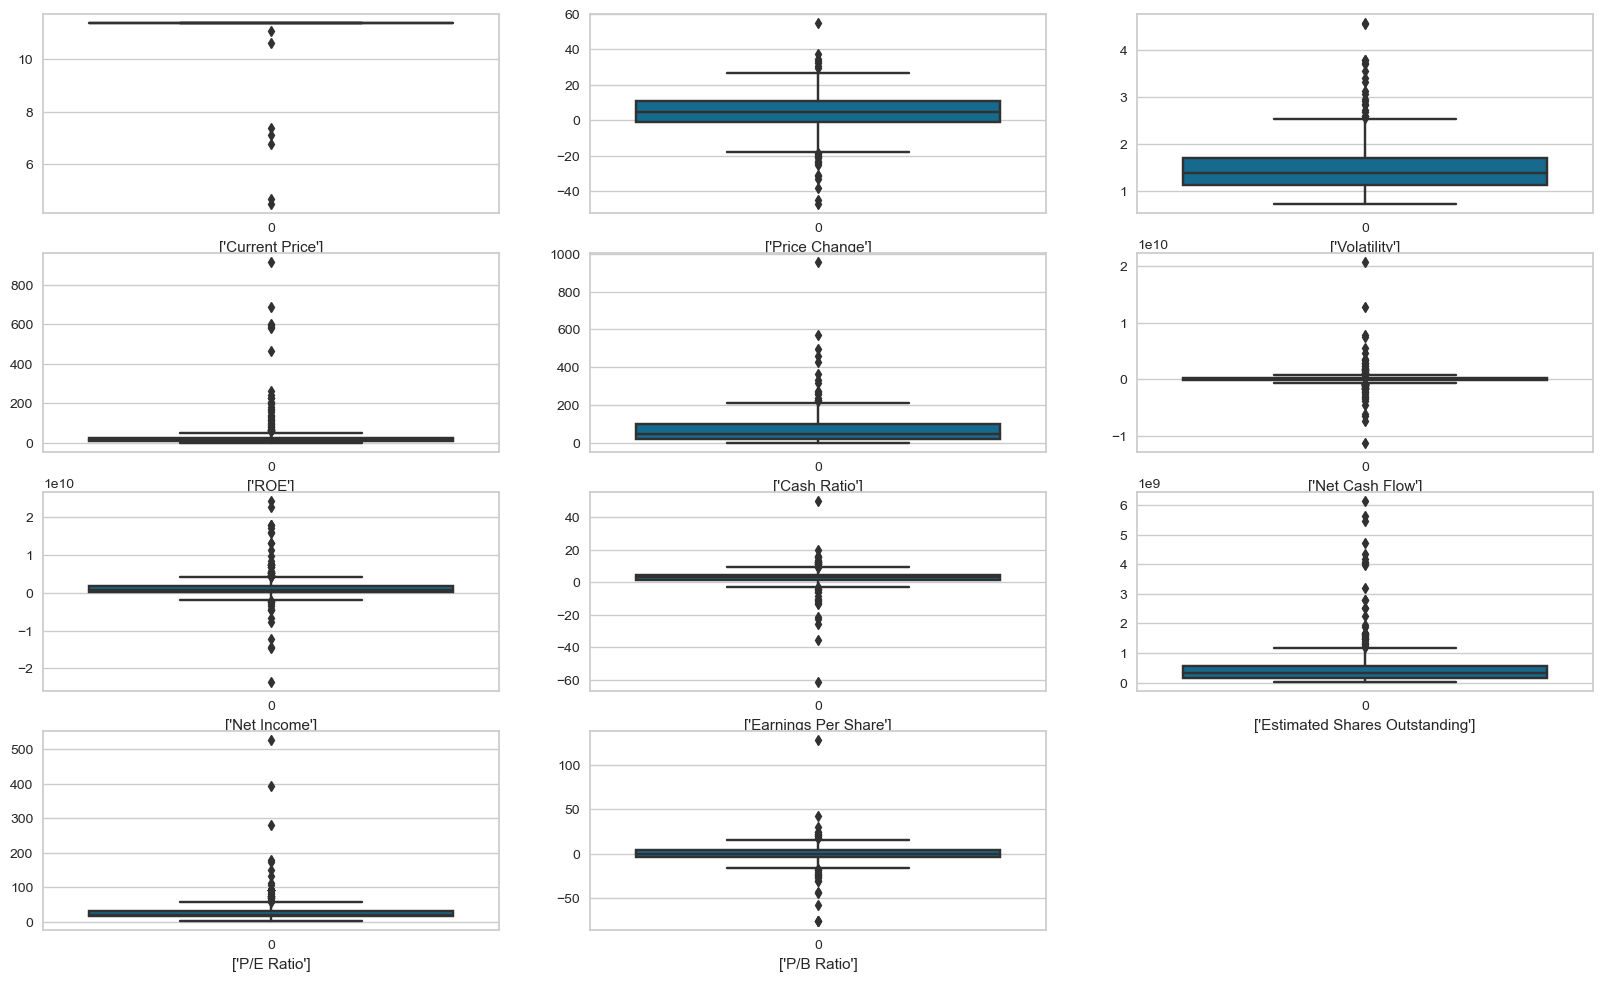

In [657]:
plt.figure(figsize=(20,15))
for i,val in enumerate (num_col):
    plt.subplot(5,3,i+1)
    sns.boxplot(df[val])
    plt.xlabel([val])

***Observation***
- We have treated the outliers but still we see the outliers in the data 

### Feature engineering 

In [658]:
Target_data = data.copy()

In [659]:
for i in cat_name:
    te=TargetEncoder()
    te.fit(df[i],df["Earnings Per Share"])
    value=te.transform(Target_data[i])
    Target_data=pd.concat([Target_data,value],axis=1)

## what is TargetEncoder ?
- Converting the Categorical values in to numerical values (we need to take target variable each fold these target variable are repeted with be calculated)

In [660]:
Target_data=Target_data.select_dtypes(exclude=np.object_)
Target_data

Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0        42.349998      9.999995    1.687151  135          51     -604000000   
1        59.240002      8.339433    2.197887  130          77       51000000   
2        44.910000     11.301121    1.273646   21          67      938000000   
3        93.940002     13.977195    1.357679    9         180     -240840000   
4        55.320000     -1.827858    1.701169   14         272      315120000   
..             ...           ...         ...  ...         ...            ...   
335      33.259998     14.887727    1.845149   15         459    -1032187000   
336      52.516175     -8.698917    1.478877  142          27      159000000   
337     102.589996      9.347683    1.404206    1         100      376000000   
338      27.299999     -1.158588    1.468176    4          99      -43623000   
339      47.919998     16.678836    1.610285   32          65      272000000   

     Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0    7610000000               11.39                  6.681299e+08    3.718174   
1    5144000000                3.15                  1.633016e+09   18.806350   
2    4423000000                2.94                  1.504422e+09   15.275510   
3     629551000                1.26                  4.996437e+08   74.555557   
4     696878000                0.31                  2.247994e+09  178.451613   
..          ...                 ...                           ...         ...   
335 -4359082000               -4.64                  9.394573e+08   28.976191   
336  1293000000                2.97                  4.353535e+08   17.682214   
337   147000000                0.78                  1.884615e+08  131.525636   
338   309471000                1.20                  2.578925e+08   22.749999   
339   339000000                0.68                  4.985294e+08   70.470585   

     P/B Ratio  Ticker Symbol  Security  GICS Sector  GICS Sub Industry  
0    -8.784219       3.897330  3.897330     4.397028           3.966685  
1    -8.750068       2.825236  2.825236     4.330906           2.569945  
2    -0.394171       2.797913  2.797913     4.330906           3.032254  
3     4.199651       2.579331  2.579331     2.375414           2.363639  
4     1.059810       2.455728  2.455728     2.375414           2.823150  
..         ...            ...       ...          ...                ...  
335   6.261775       1.811691  1.811691     2.375414           2.373630  
336  -3.838260       2.801817  2.801817     4.317254           3.536632  
337 -23.884449       2.516879  2.516879     4.330906           3.032254  
338  -0.063096       2.571525  2.571525     4.145112           2.640218  
339   1.723068       2.503868  2.503868     4.330906           2.569945  

[340 rows x 15 columns]

In [661]:
#standardscaling
Target_data=Target_data.drop(["Ticker Symbol","Security"],axis=1)
Target_data

Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0        42.349998      9.999995    1.687151  135          51     -604000000   
1        59.240002      8.339433    2.197887  130          77       51000000   
2        44.910000     11.301121    1.273646   21          67      938000000   
3        93.940002     13.977195    1.357679    9         180     -240840000   
4        55.320000     -1.827858    1.701169   14         272      315120000   
..             ...           ...         ...  ...         ...            ...   
335      33.259998     14.887727    1.845149   15         459    -1032187000   
336      52.516175     -8.698917    1.478877  142          27      159000000   
337     102.589996      9.347683    1.404206    1         100      376000000   
338      27.299999     -1.158588    1.468176    4          99      -43623000   
339      47.919998     16.678836    1.610285   32          65      272000000   

     Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0    7610000000               11.39                  6.681299e+08    3.718174   
1    5144000000                3.15                  1.633016e+09   18.806350   
2    4423000000                2.94                  1.504422e+09   15.275510   
3     629551000                1.26                  4.996437e+08   74.555557   
4     696878000                0.31                  2.247994e+09  178.451613   
..          ...                 ...                           ...         ...   
335 -4359082000               -4.64                  9.394573e+08   28.976191   
336  1293000000                2.97                  4.353535e+08   17.682214   
337   147000000                0.78                  1.884615e+08  131.525636   
338   309471000                1.20                  2.578925e+08   22.749999   
339   339000000                0.68                  4.985294e+08   70.470585   

     P/B Ratio  GICS Sector  GICS Sub Industry  
0    -8.784219     4.397028           3.966685  
1    -8.750068     4.330906           2.569945  
2    -0.394171     4.330906           3.032254  
3     4.199651     2.375414           2.363639  
4     1.059810     2.375414           2.823150  
..         ...          ...                ...  
335   6.261775     2.375414           2.373630  
336  -3.838260     4.317254           3.536632  
337 -23.884449     4.330906           3.032254  
338  -0.063096     4.145112           2.640218  
339   1.723068     4.330906           2.569945  

[340 rows x 13 columns]

In [662]:
Scaling = StandardScaler()
Scaling_df=Target_data.copy()
Scaling_data=Scaling.fit_transform(Scaling_df)
Scaling_data.shape

(340, 13)

In [663]:
Scaling_data_df=pd.DataFrame(Scaling_data,columns=Target_data.columns)
Scaling_data_df

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0        -0.393341      0.493950    0.272749  0.989601   -0.210698   
1        -0.220837      0.355439    1.137045  0.937737    0.077269   
2        -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3         0.133567      0.825696   -0.284802 -0.317379    1.218059   
4        -0.260874     -0.492636    0.296470 -0.265515    2.237018   
..             ...           ...         ...       ...         ...   
335      -0.486181      0.901646    0.540121 -0.255142    4.308162   
336      -0.289510     -1.065766   -0.079703  1.062211   -0.476513   
337       0.221913      0.439539   -0.206067 -0.400362    0.332009   
338      -0.547053     -0.436811   -0.097813 -0.369243    0.320933   
339      -0.336453      1.051046    0.142671 -0.078803   -0.055639   

     Net Cash Flow  Net Income  Earnings Per Share  \
0        -0.339355    1.554415            1.309399   
1        -0.002335    0.927628            0.056755   
2         0.454058    0.744371            0.024831   
3        -0.152497   -0.219816           -0.230563   
4         0.133564   -0.202703           -0.374982   
..             ...         ...                 ...   
335      -0.559673   -1.487784           -1.127481   
336       0.053235   -0.051186            0.029391   
337       0.164889   -0.342467           -0.303532   
338      -0.051022   -0.301171           -0.239684   
339       0.111378   -0.293666           -0.318734   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  GICS Sector  \
0                        0.107863  -0.652487  -0.506653     0.617320   
1                        1.250274  -0.311769  -0.504205     0.589552   
2                        1.098021  -0.391502   0.094941     0.589552   
3                       -0.091622   0.947148   0.424333    -0.231655   
4                        1.978399   3.293307   0.199196    -0.231655   
..                            ...        ...        ...          ...   
335                      0.429111  -0.082116   0.572194    -0.231655   
336                     -0.167741  -0.337154  -0.152012     0.583819   
337                     -0.460058   2.233634  -1.589390     0.589552   
338                     -0.377852  -0.222714   0.118680     0.511528   
339                     -0.092942   0.854902   0.246754     0.589552   

     GICS Sub Industry  
0             0.964077  
1            -0.043671  
2             0.289885  
3            -0.192520  
4             0.139016  
..                 ...  
335          -0.185312  
336           0.653794  
337           0.289885  
338           0.007032  
339          -0.043671  

[340 rows x 13 columns]

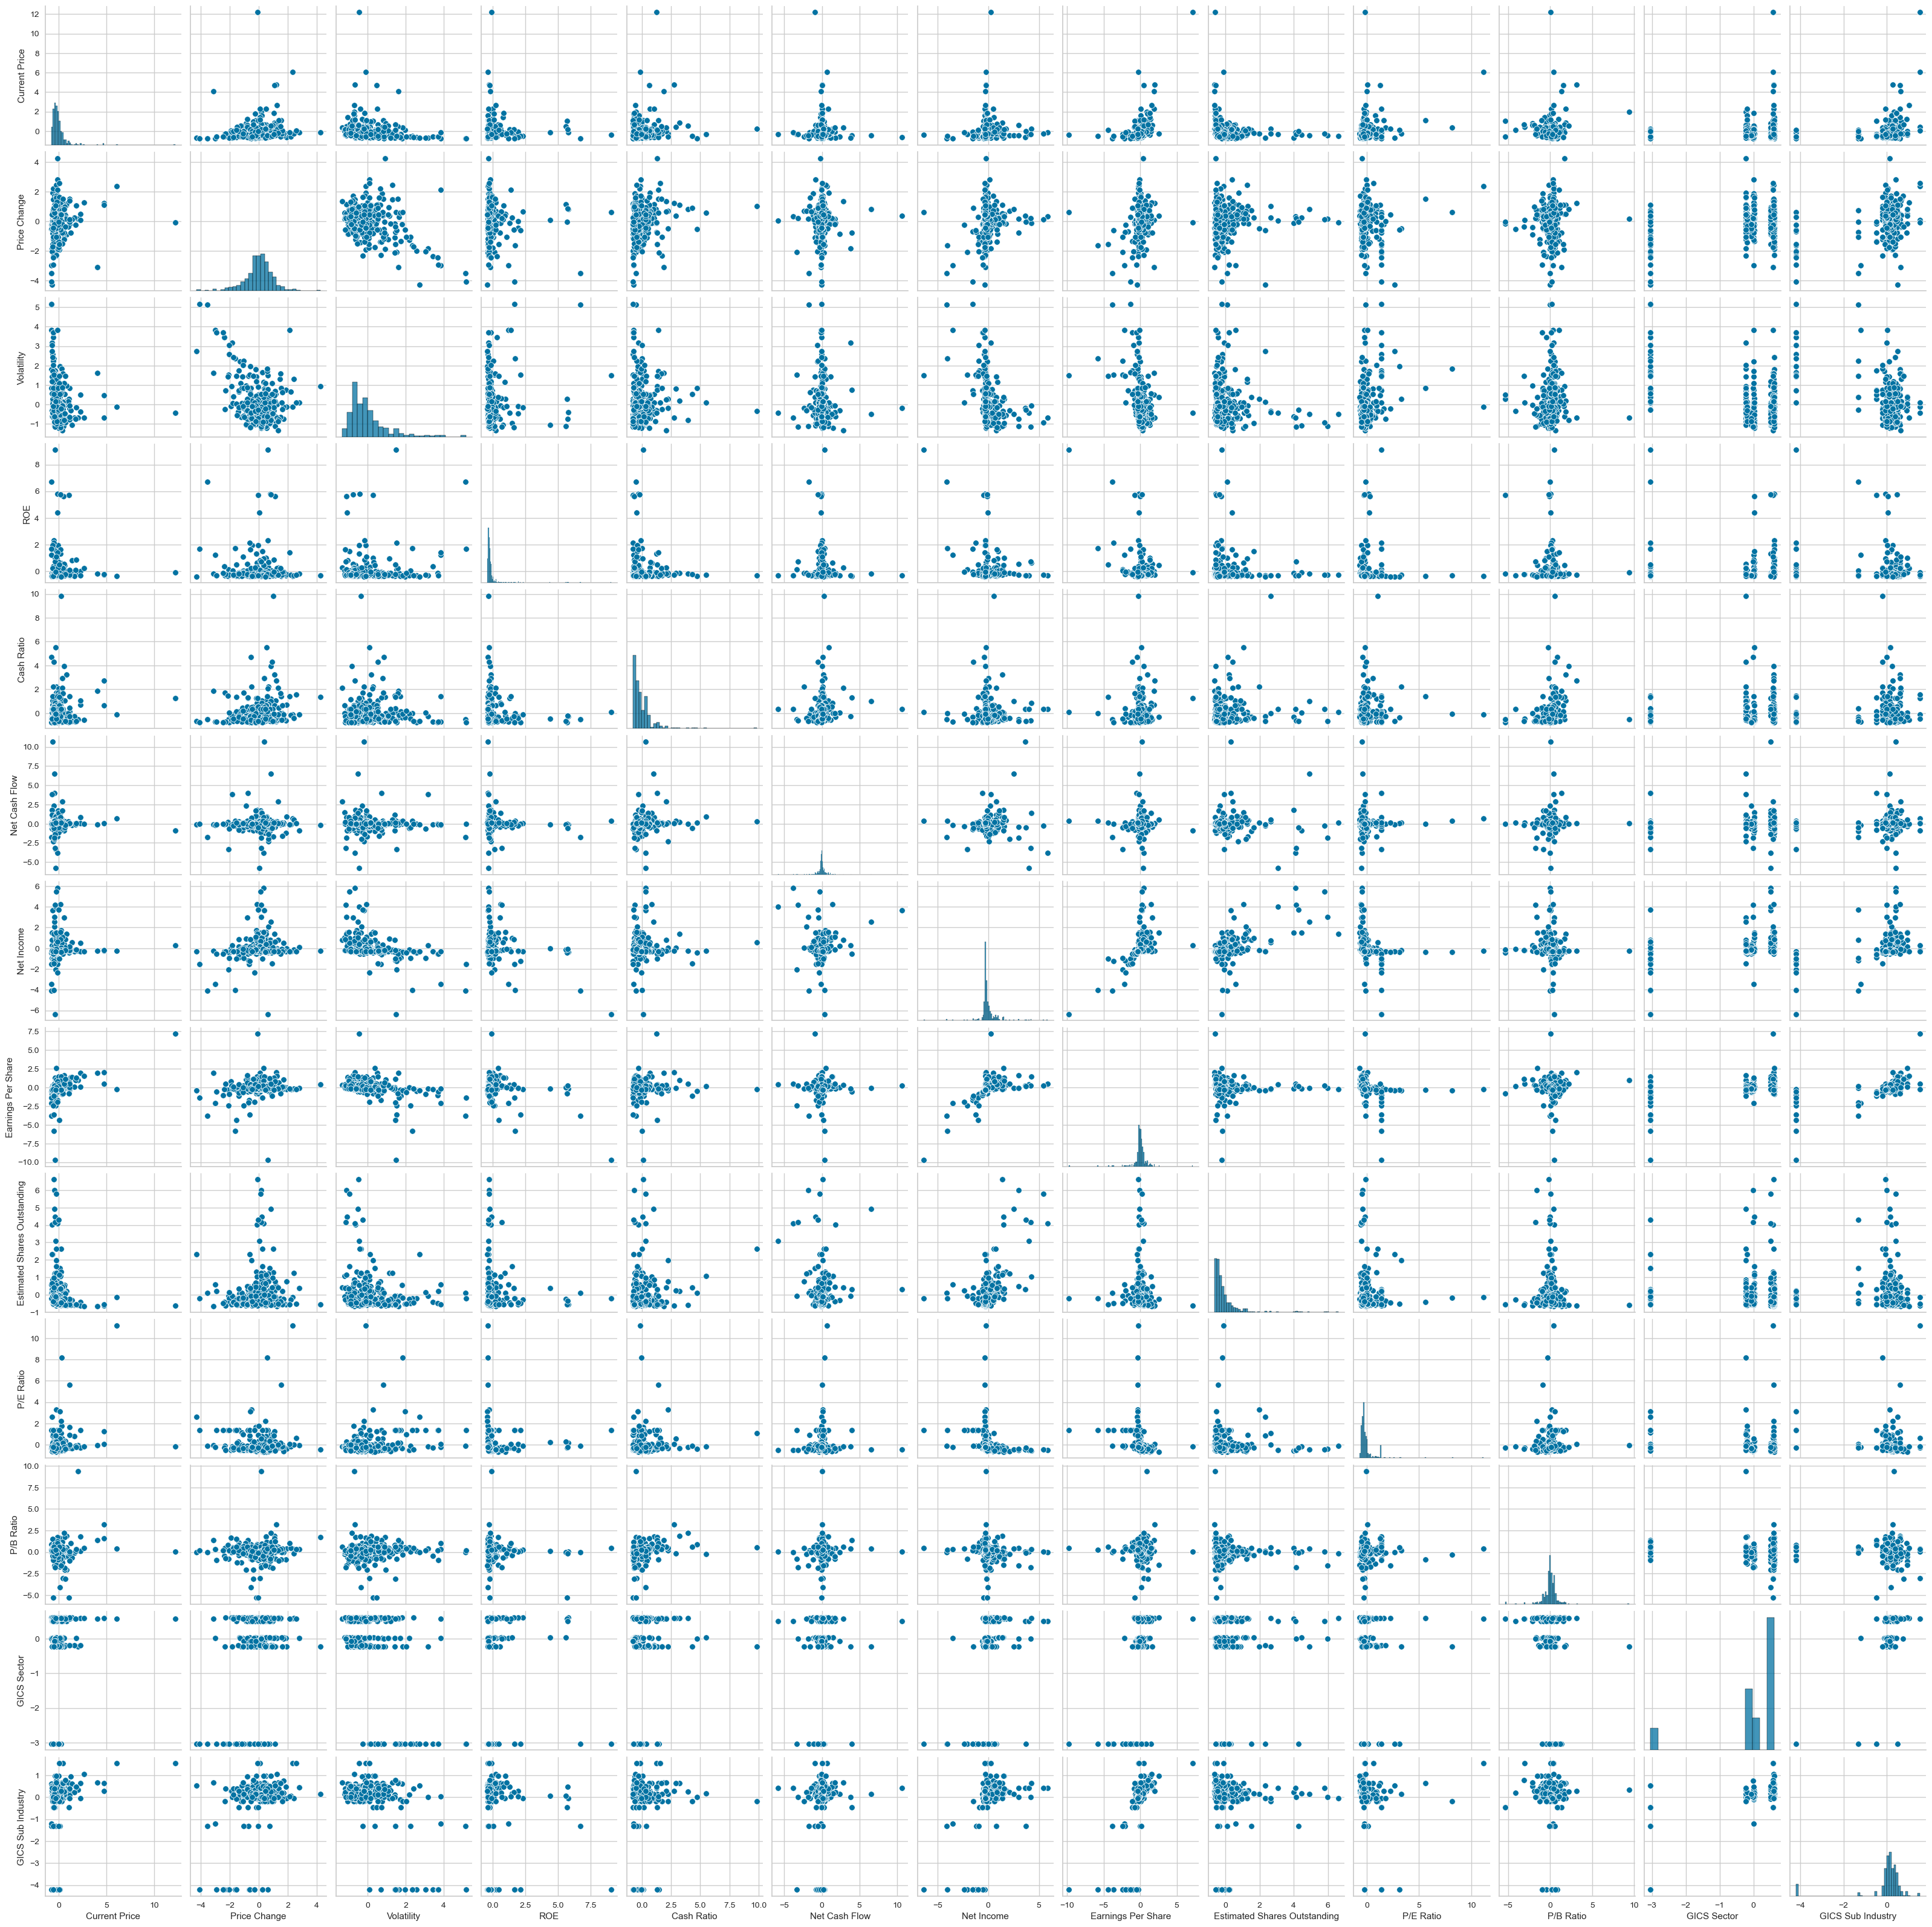

In [664]:
sns.pairplot(Scaling_data_df)

## K-means Clustering
***Steps***
- Find the k value (using the elbow method )
- find the Destortion
- find the Silhouette score 
- for visulization we use the Silhouette_visulization
#### what are the adavantage and disadantage of k-mean clustering 

- Pros:
- Can be implemented with ease and it is faster than other clustering algorithms
- Works great on large scale data
- Results guarantee convergence
- Easily works with new examples
- Cons:
- Sensitive to outliers
- Quite difficult to determine the number of clusters
- Sensitive to initialization of cluster centers12


In [665]:
clustering = np.arange(1,10)
Destortion=[]
for i in clustering:
    kmean=KMeans(n_clusters=i)
    kmean.fit(Scaling_data_df)
    value = kmean.transform(Scaling_data_df)
    Destortion.append(sum(np.min(cdist(Scaling_data_df,kmean.cluster_centers_),axis=-1))/Scaling_data_df.shape[0])
Destortion

[2.7845826746661433,
 2.5246660015780837,
 2.41633837543872,
 2.3140064788007155,
 2.267679631483186,
 2.238257888535335,
 2.165947554813278,
 2.1137427183044433,
 2.0885997172802746]

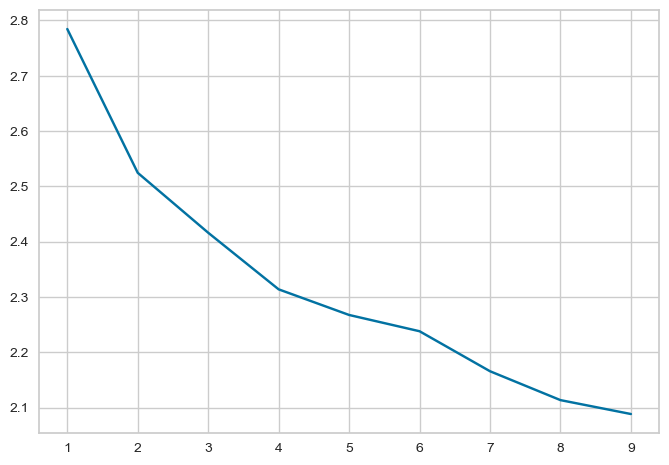

In [666]:
plt.plot(clustering,Destortion,"-bx")

***Observation***
- From the observation we can see that k - values lies b/w 2 and 4 
- Futher conformation we will do Silhouette_score 

### Silhouette_score 

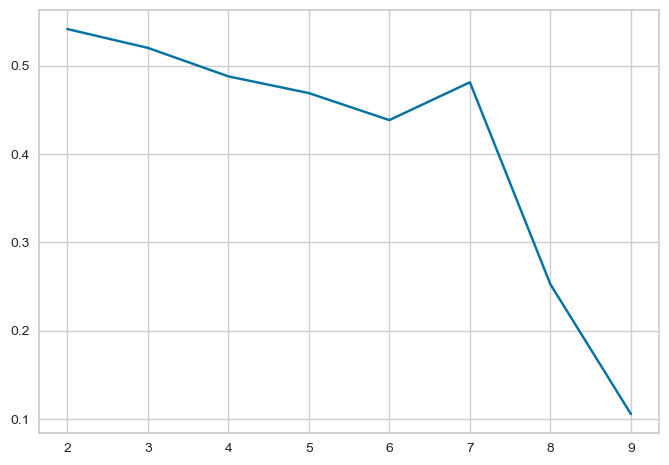

In [667]:
cluster =np.arange(2,10)
silhouette=[]
for i in cluster :
    model = KMeans(n_clusters=i,init="k-means++")
    pre=model.fit_predict((Scaling_data_df))
    silhouette.append(silhouette_score(Scaling_data_df,pre))
plt.plot(cluster,silhouette)

***Observation*** 
- The silhouette score shows the 2 has the highest score and fallowed by the 4 
- we need to check the vizulization 

### Silhouette visulization 

- 2 cluster 

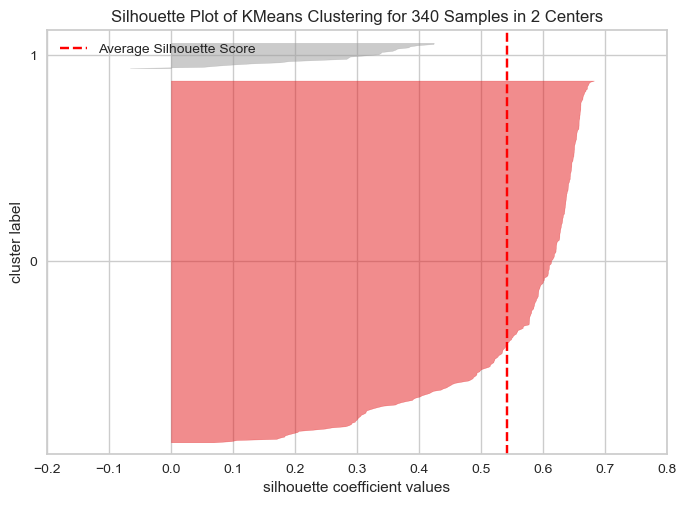

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [668]:
visulizer= SilhouetteVisualizer(KMeans(n_clusters=2,random_state=1))
visulizer.fit(Scaling_data_df)
visulizer.show()

***Observation***
- The cluster 2 has more radius than the other cluster 

## K-mean 3- Clusters

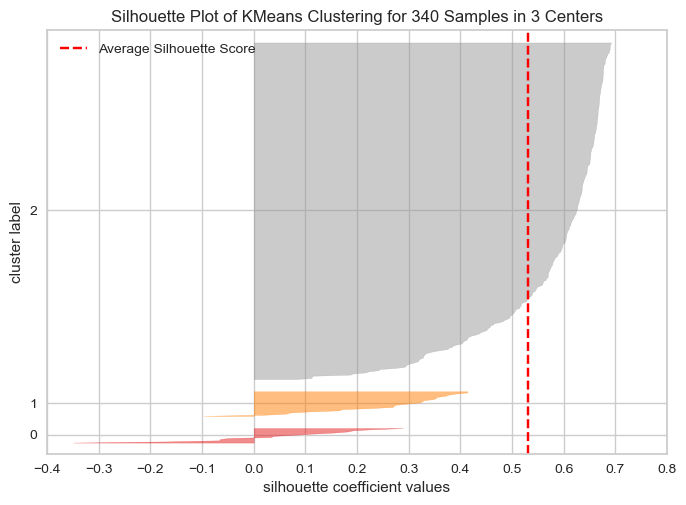

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [669]:
visulization = SilhouetteVisualizer(KMeans(n_clusters=3,random_state=1))
visulization.fit(Scaling_data_df)
visulization.show()

***Observation***
- The data shows  2nd cluster has more radius that mean the one cluster has more data than the others 
- now we are able to see the outliers in the cluster 0 and 1 

## K-means 4 cluster 

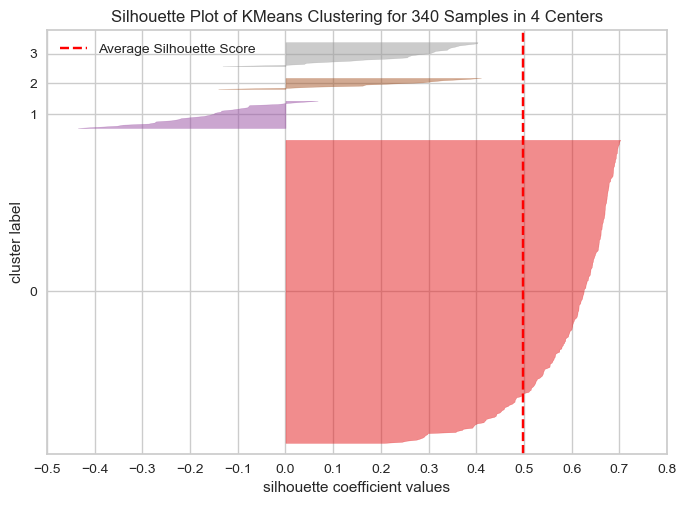

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [670]:
visuization= SilhouetteVisualizer(KMeans(n_clusters=4,random_state=1))
visuization.fit(Scaling_data_df)
visuization.show()

***Observation***
- As we are increasing the cluster number the we are increasing the outliers and radius of major cluster is nod reducing 
- Considering the number of the cluster from the above cases we are moving with the k=2 

## Final k-mean model (k=2)

In [671]:
final_model = KMeans(n_clusters=2,random_state=1)
final_model.fit_transform(Scaling_data_df)
pre=final_model.fit_predict(Scaling_data_df)
silhou_score= silhouette_score(Scaling_data_df,pre)
silhou_score

0.5414366069113672

In [672]:
Kmean_clustering= Target_data.copy()
Kmean_clustering["Labels"]= final_model.labels_
kclustering=Kmean_clustering.groupby(["Labels"]).median()
kclustering.style.highlight_max()

In [673]:
kclustering=Kmean_clustering.groupby(["Labels"]).mean()
k_cluster_result=kclustering.style.highlight_max()
k_cluster_result

***Observation***
* what 0 represent?
- 0 is a risk free 
- currentprice is high and the price changes has a increment increase 
- Volatility is less and ROE is a low 
- company need to have Cash Ratio,Net Cash Flow	Net Income,Earnings Per Share,Estimated Shares Outstanding are the main categorical 
* what 1 represent ?
- 1 is the risk stocks 
- current price are low
- when there is sudden price drop 
- high Volatility and ROE 
- P/E Ratio	P/B Ratio are consider the high risk factors 

Visualizing the lower dimensional representation of data for different values of perplexity


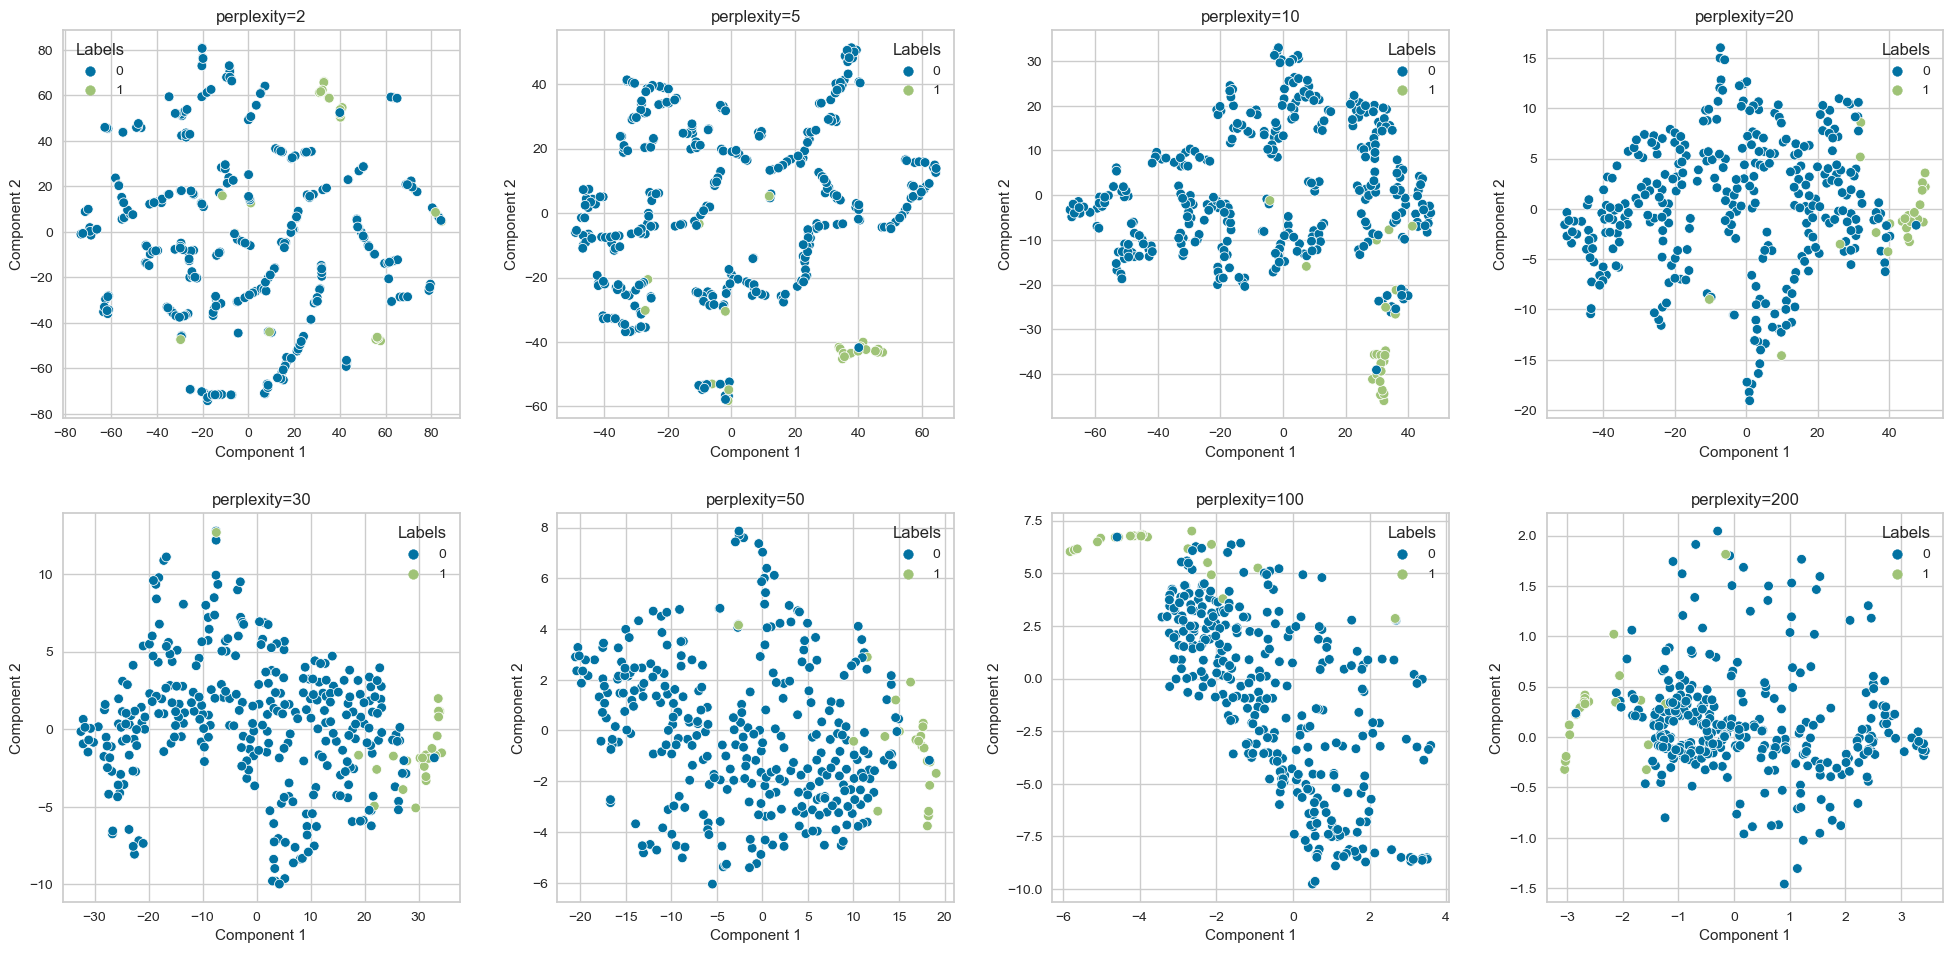

In [674]:
perplexity = [2, 5, 10, 20, 30, 50, 100, 200]

plt.figure(figsize=(20, 10))
print(
    "Visualizing the lower dimensional representation of data for different values of perplexity"
)

for i in range(len(perplexity)):
    tsne = TSNE(n_components=2, perplexity=perplexity[i], n_jobs=-2, random_state=1)
    # n_jobs specifies the number of parallel jobs to run
    # -2 means using all processors except one
    X_red = tsne.fit_transform(Kmean_clustering)

    red_data_df = pd.DataFrame(data=X_red, columns=["Component 1", "Component 2"])

    plt.subplot(2, int(len(perplexity) / 2), i + 1)

    plt.title("perplexity=" + str(perplexity[i]))
    sns.scatterplot(data=red_data_df, x="Component 1", y="Component 2", hue=Kmean_clustering["Labels"]),
    plt.tight_layout(pad=2)

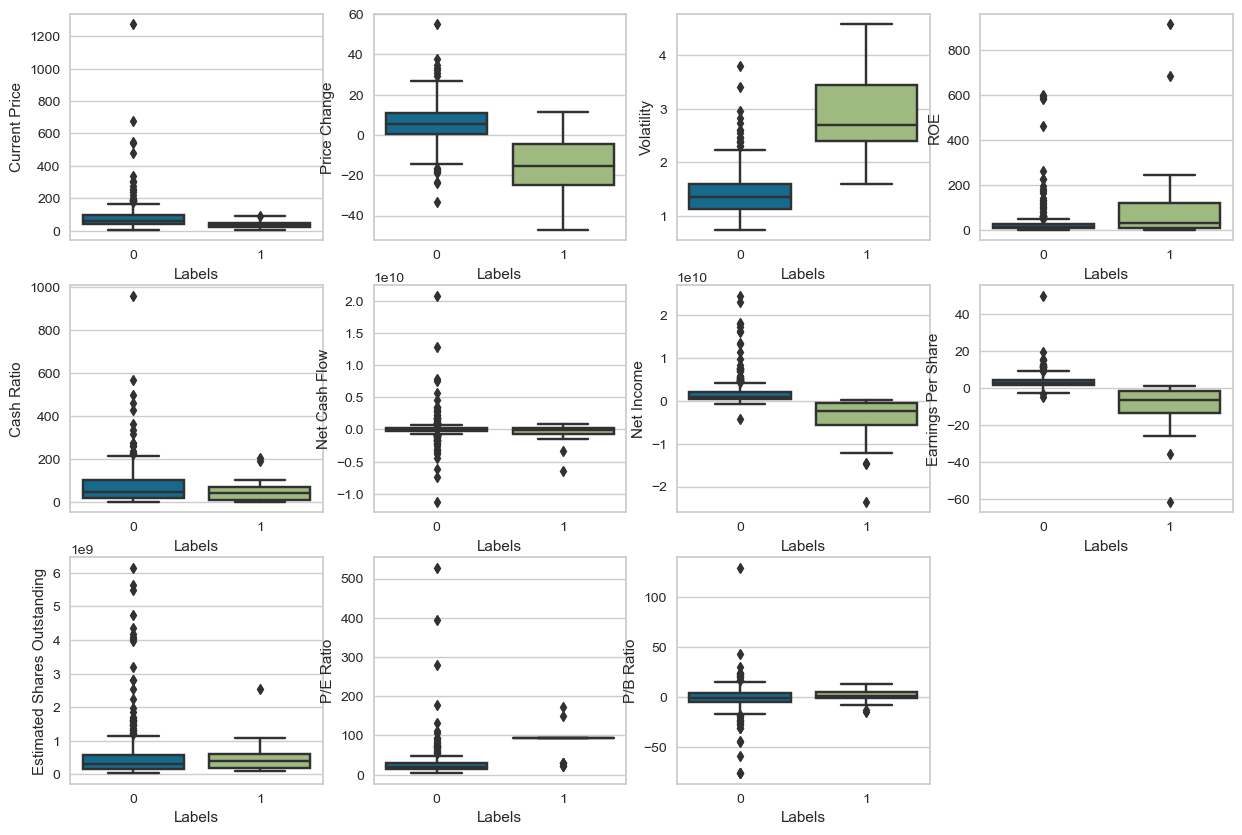

In [675]:
plt.figure(figsize=(15,10))
for i,var in enumerate (num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(Kmean_clustering,x="Labels",y=var)
    

## Hierarchical Clustering

In [676]:
Scaling_data_df

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0        -0.393341      0.493950    0.272749  0.989601   -0.210698   
1        -0.220837      0.355439    1.137045  0.937737    0.077269   
2        -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3         0.133567      0.825696   -0.284802 -0.317379    1.218059   
4        -0.260874     -0.492636    0.296470 -0.265515    2.237018   
..             ...           ...         ...       ...         ...   
335      -0.486181      0.901646    0.540121 -0.255142    4.308162   
336      -0.289510     -1.065766   -0.079703  1.062211   -0.476513   
337       0.221913      0.439539   -0.206067 -0.400362    0.332009   
338      -0.547053     -0.436811   -0.097813 -0.369243    0.320933   
339      -0.336453      1.051046    0.142671 -0.078803   -0.055639   

     Net Cash Flow  Net Income  Earnings Per Share  \
0        -0.339355    1.554415            1.309399   
1        -0.002335    0.927628            0.056755   
2         0.454058    0.744371            0.024831   
3        -0.152497   -0.219816           -0.230563   
4         0.133564   -0.202703           -0.374982   
..             ...         ...                 ...   
335      -0.559673   -1.487784           -1.127481   
336       0.053235   -0.051186            0.029391   
337       0.164889   -0.342467           -0.303532   
338      -0.051022   -0.301171           -0.239684   
339       0.111378   -0.293666           -0.318734   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  GICS Sector  \
0                        0.107863  -0.652487  -0.506653     0.617320   
1                        1.250274  -0.311769  -0.504205     0.589552   
2                        1.098021  -0.391502   0.094941     0.589552   
3                       -0.091622   0.947148   0.424333    -0.231655   
4                        1.978399   3.293307   0.199196    -0.231655   
..                            ...        ...        ...          ...   
335                      0.429111  -0.082116   0.572194    -0.231655   
336                     -0.167741  -0.337154  -0.152012     0.583819   
337                     -0.460058   2.233634  -1.589390     0.589552   
338                     -0.377852  -0.222714   0.118680     0.511528   
339                     -0.092942   0.854902   0.246754     0.589552   

     GICS Sub Industry  
0             0.964077  
1            -0.043671  
2             0.289885  
3            -0.192520  
4             0.139016  
..                 ...  
335          -0.185312  
336           0.653794  
337           0.289885  
338           0.007032  
339          -0.043671  

[340 rows x 13 columns]

In [677]:
# Z= linkage(Scaling_data_df,method="single",metric="euclidean")
# c,cophera= cophenet(Z,pdist(Scaling_data_df))
# c
distance_metrix=["euclidean","cityblock","chebyshev","mahalanobis"]
link_method=["single", "complete", "average", "weighted"]
highest_c=0
highest_dm_lm=[0,0]
for dm in distance_metrix:
    for lm in link_method:
        Z= linkage(Scaling_data_df,method=lm,metric=dm)
        c,cophe=cophenet(Z,pdist(Scaling_data_df))
        print("The {} link method, The {} Distance, The c value {}".format(lm.capitalize(),dm.capitalize(),c))
        if highest_c< c:
            highest_c=c
            highest_dm_lm[0]=dm
            highest_dm_lm[1]=lm

The Single link method, The Euclidean Distance, The c value 0.9286351974671321
The Complete link method, The Euclidean Distance, The c value 0.8997501863427066
The Average link method, The Euclidean Distance, The c value 0.9496161388743629
The Weighted link method, The Euclidean Distance, The c value 0.8998150165465131
The Single link method, The Cityblock Distance, The c value 0.9357621778480737
The Complete link method, The Cityblock Distance, The c value 0.644542272078475
The Average link method, The Cityblock Distance, The c value 0.9192022757302826
The Weighted link method, The Cityblock Distance, The c value 0.8647766042687631
The Single link method, The Chebyshev Distance, The c value 0.9079446457384741
The Complete link method, The Chebyshev Distance, The c value 0.8277914505636763
The Average link method, The Chebyshev Distance, The c value 0.9228451819279582
The Weighted link method, The Chebyshev Distance, The c value 0.8255276198299494
The Single link method, The Mahalanobi

## The Average link method, The Euclidean Distance, The c value 0.9496161388743629 

## Checking Euclidean distance with different linkage method 

In [678]:

link_method=["single", "complete", "average", "centroid", "ward", "weighted"]
highest_c=0
highest_dm_lm=[0,0]
for lm in link_method:
        Z= linkage(Scaling_data_df,method=lm,metric="euclidean")
        c,cophe=cophenet(Z,pdist(Scaling_data_df))
        print("The {} link method, The euclidean Distance, The c value {}".format(lm.capitalize(),c))
        if highest_c< c:
            highest_c=c
            highest_dm_lm[0]="euclidean"
            highest_dm_lm[1]=lm

The Single link method, The euclidean Distance, The c value 0.9286351974671321
The Complete link method, The euclidean Distance, The c value 0.8997501863427066
The Average link method, The euclidean Distance, The c value 0.9496161388743629
The Centroid link method, The euclidean Distance, The c value 0.9556025941199036
The Ward link method, The euclidean Distance, The c value 0.7497369342417632
The Weighted link method, The euclidean Distance, The c value 0.8998150165465131


## Checking with Dendogram 

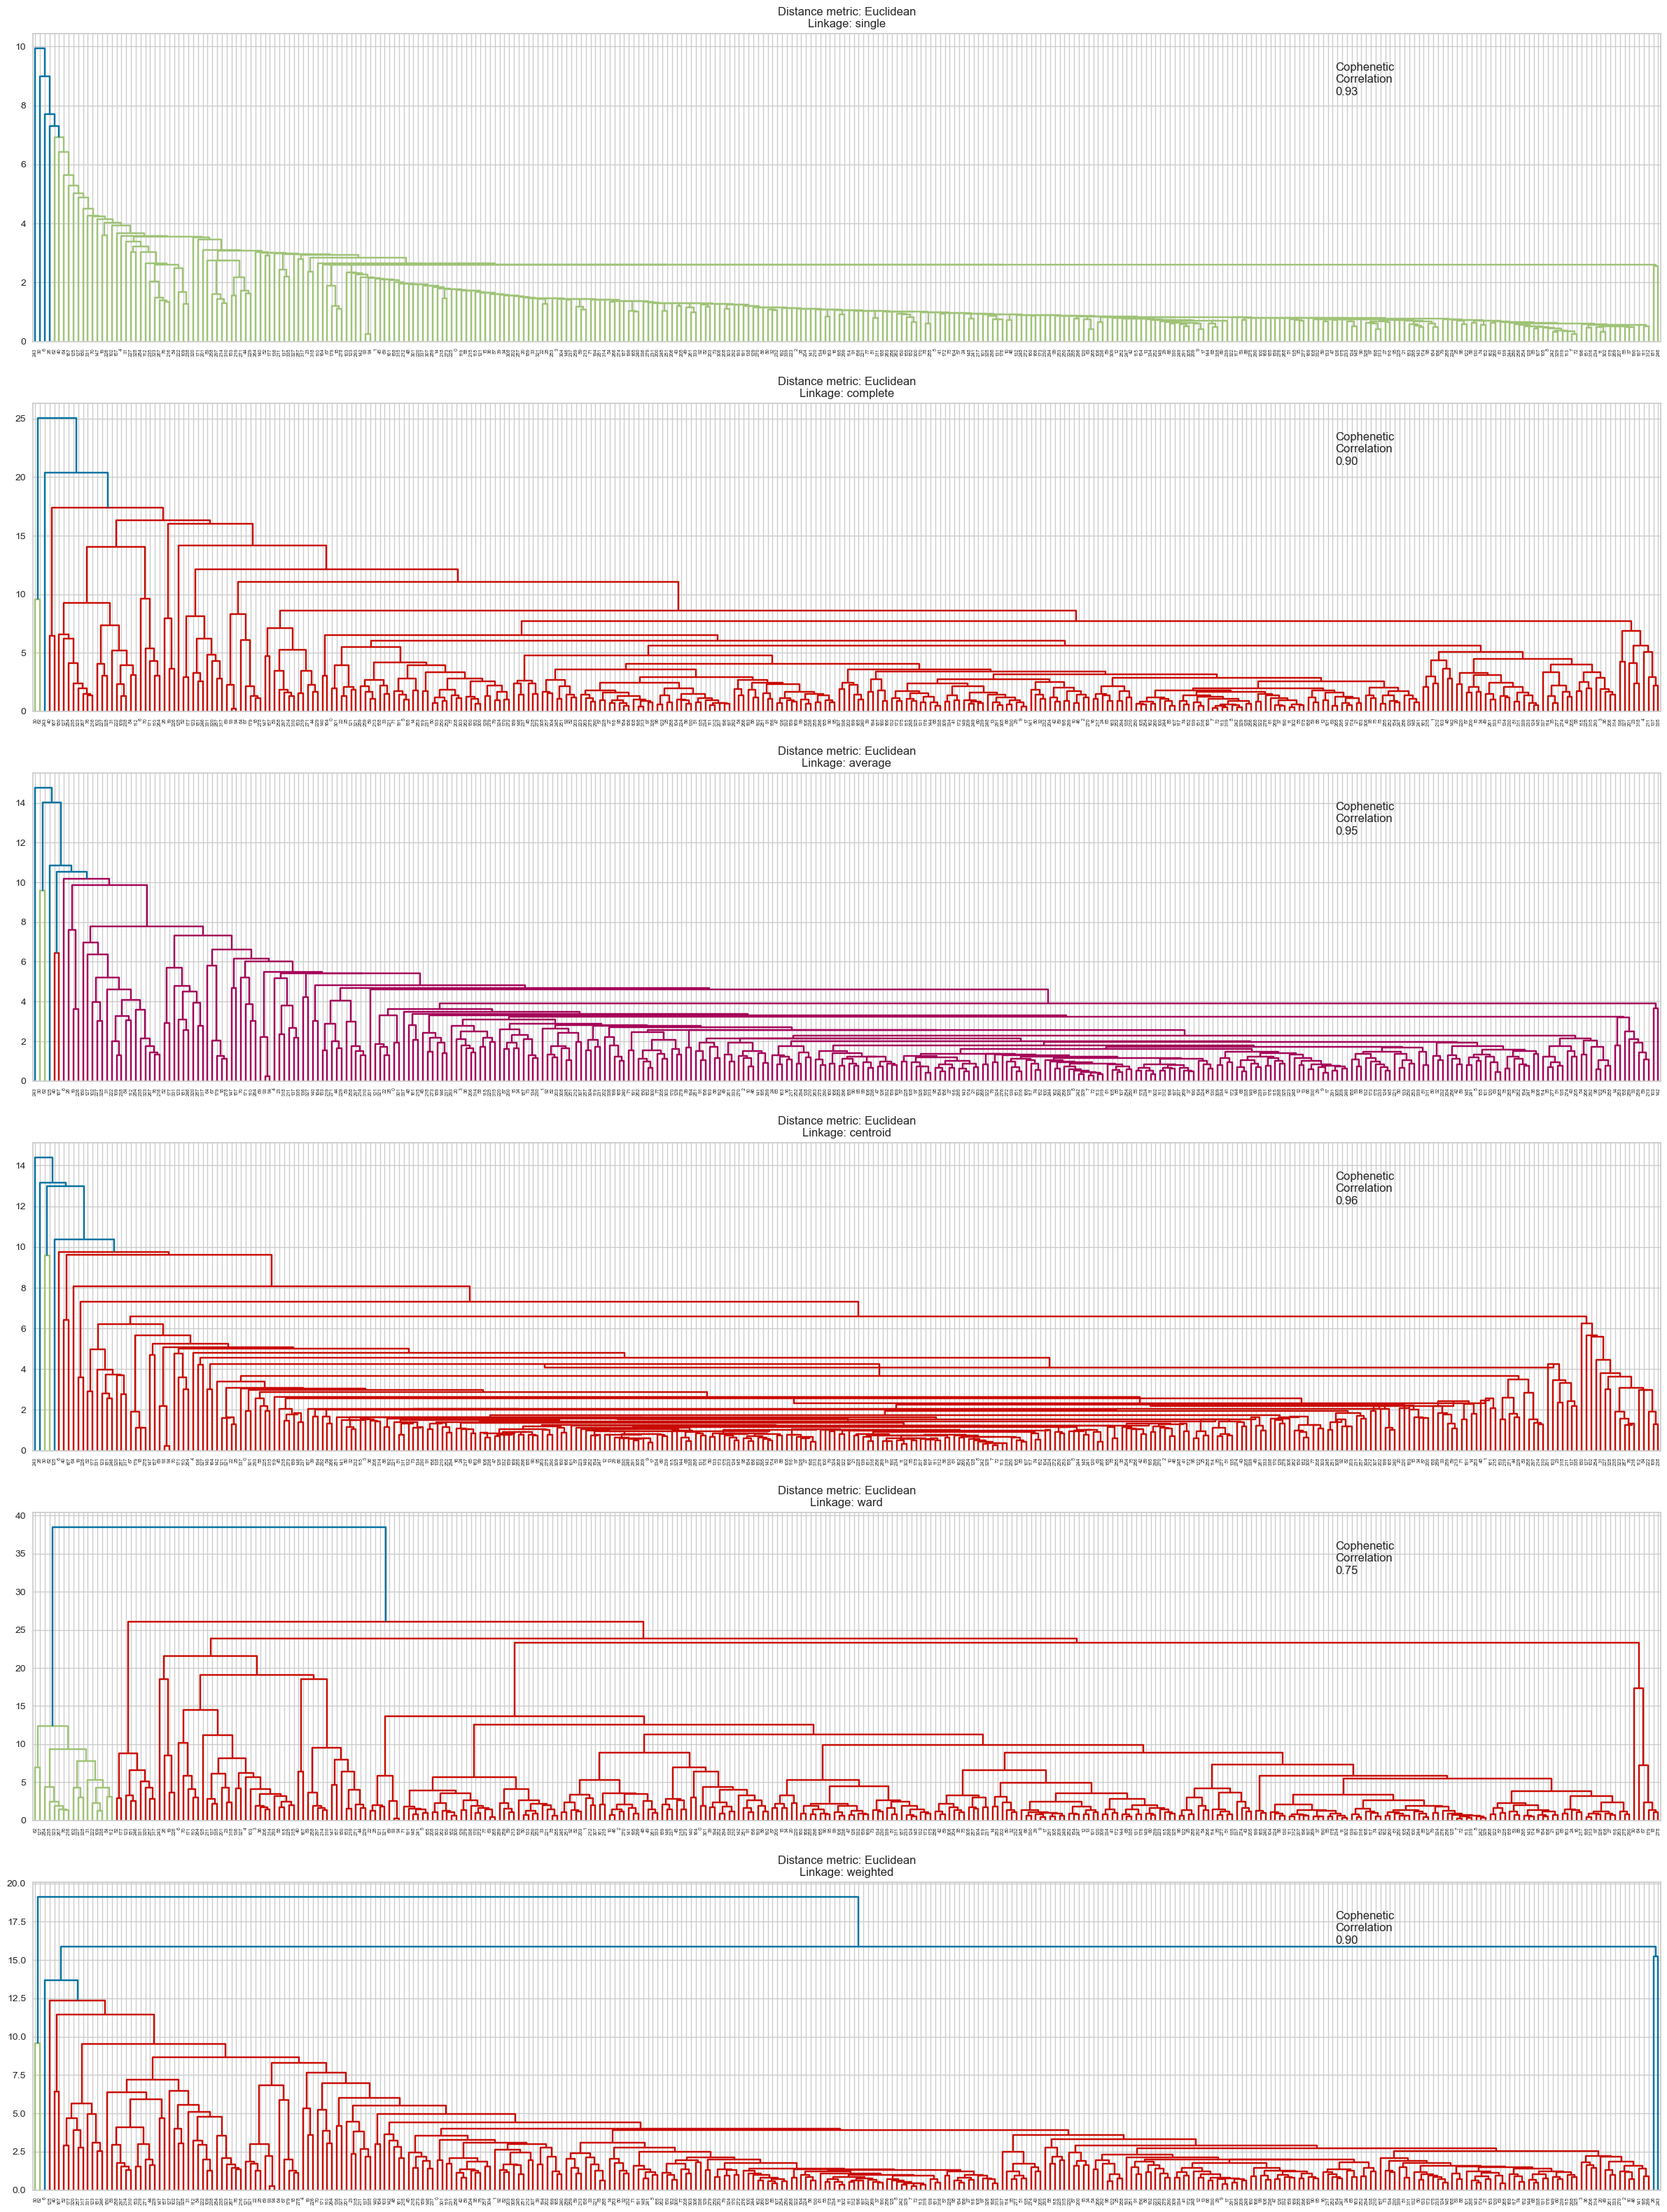

In [679]:
distance_metrix=["euclidean"]
link_method=["single", "complete", "average", "centroid", "ward", "weighted"]
fig,axs=plt.subplots(len(link_method),1,figsize=(30,40))
i=0
for dm in distance_metrix:
    for lm in link_method:
        Z= linkage(Scaling_data_df,method=lm,metric=dm)
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))
        c,cophe=cophenet(Z,pdist(Scaling_data_df))
        dendrogram(Z,ax=axs[i])
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{c:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i+=1

### What are the outcome ?
- 1 Distance: eucledean linkage:single (0.93)
- 2 Distance: eucledean linkage:complete(0.90)
- 3 Distance: eucledean linkage:ward (0.75)
### how many clusters ?
- From the Distance: eucledean linkage:single (0.93) Gives 2 cluster 
- From the Distance: eucledean linkage:complete (0.90) Gives 3 cluster 
- From the Distance: eucledean linkage:ward (0.75) Gives 3 cluster 


## Final AgglomerativeClustering

In [680]:
model =AgglomerativeClustering(n_clusters=3,linkage="ward",metric="euclidean")
model.fit(Scaling_data_df)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [681]:
Agglomerative_final=Target_data.copy()
Agglomerative_final["Labels"]=model.labels_
Agglomerative_final

Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0        42.349998      9.999995    1.687151  135          51     -604000000   
1        59.240002      8.339433    2.197887  130          77       51000000   
2        44.910000     11.301121    1.273646   21          67      938000000   
3        93.940002     13.977195    1.357679    9         180     -240840000   
4        55.320000     -1.827858    1.701169   14         272      315120000   
..             ...           ...         ...  ...         ...            ...   
335      33.259998     14.887727    1.845149   15         459    -1032187000   
336      52.516175     -8.698917    1.478877  142          27      159000000   
337     102.589996      9.347683    1.404206    1         100      376000000   
338      27.299999     -1.158588    1.468176    4          99      -43623000   
339      47.919998     16.678836    1.610285   32          65      272000000   

     Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0    7610000000               11.39                  6.681299e+08    3.718174   
1    5144000000                3.15                  1.633016e+09   18.806350   
2    4423000000                2.94                  1.504422e+09   15.275510   
3     629551000                1.26                  4.996437e+08   74.555557   
4     696878000                0.31                  2.247994e+09  178.451613   
..          ...                 ...                           ...         ...   
335 -4359082000               -4.64                  9.394573e+08   28.976191   
336  1293000000                2.97                  4.353535e+08   17.682214   
337   147000000                0.78                  1.884615e+08  131.525636   
338   309471000                1.20                  2.578925e+08   22.749999   
339   339000000                0.68                  4.985294e+08   70.470585   

     P/B Ratio  GICS Sector  GICS Sub Industry  Labels  
0    -8.784219     4.397028           3.966685       0  
1    -8.750068     4.330906           2.569945       0  
2    -0.394171     4.330906           3.032254       0  
3     4.199651     2.375414           2.363639       0  
4     1.059810     2.375414           2.823150       0  
..         ...          ...                ...     ...  
335   6.261775     2.375414           2.373630       0  
336  -3.838260     4.317254           3.536632       0  
337 -23.884449     4.330906           3.032254       0  
338  -0.063096     4.145112           2.640218       0  
339   1.723068     4.330906           2.569945       0  

[340 rows x 14 columns]

In [682]:
Agglomerative_final_result=Agglomerative_final.groupby(["Labels"]).mean().style.highlight_max()
Agglomerative_final_result

In [683]:
Agglomerative_final["Labels"].value_counts()

Labels
0    314
1     17
2      9
Name: count, dtype: int64

Visualizing the lower dimensional representation of data for different values of perplexity


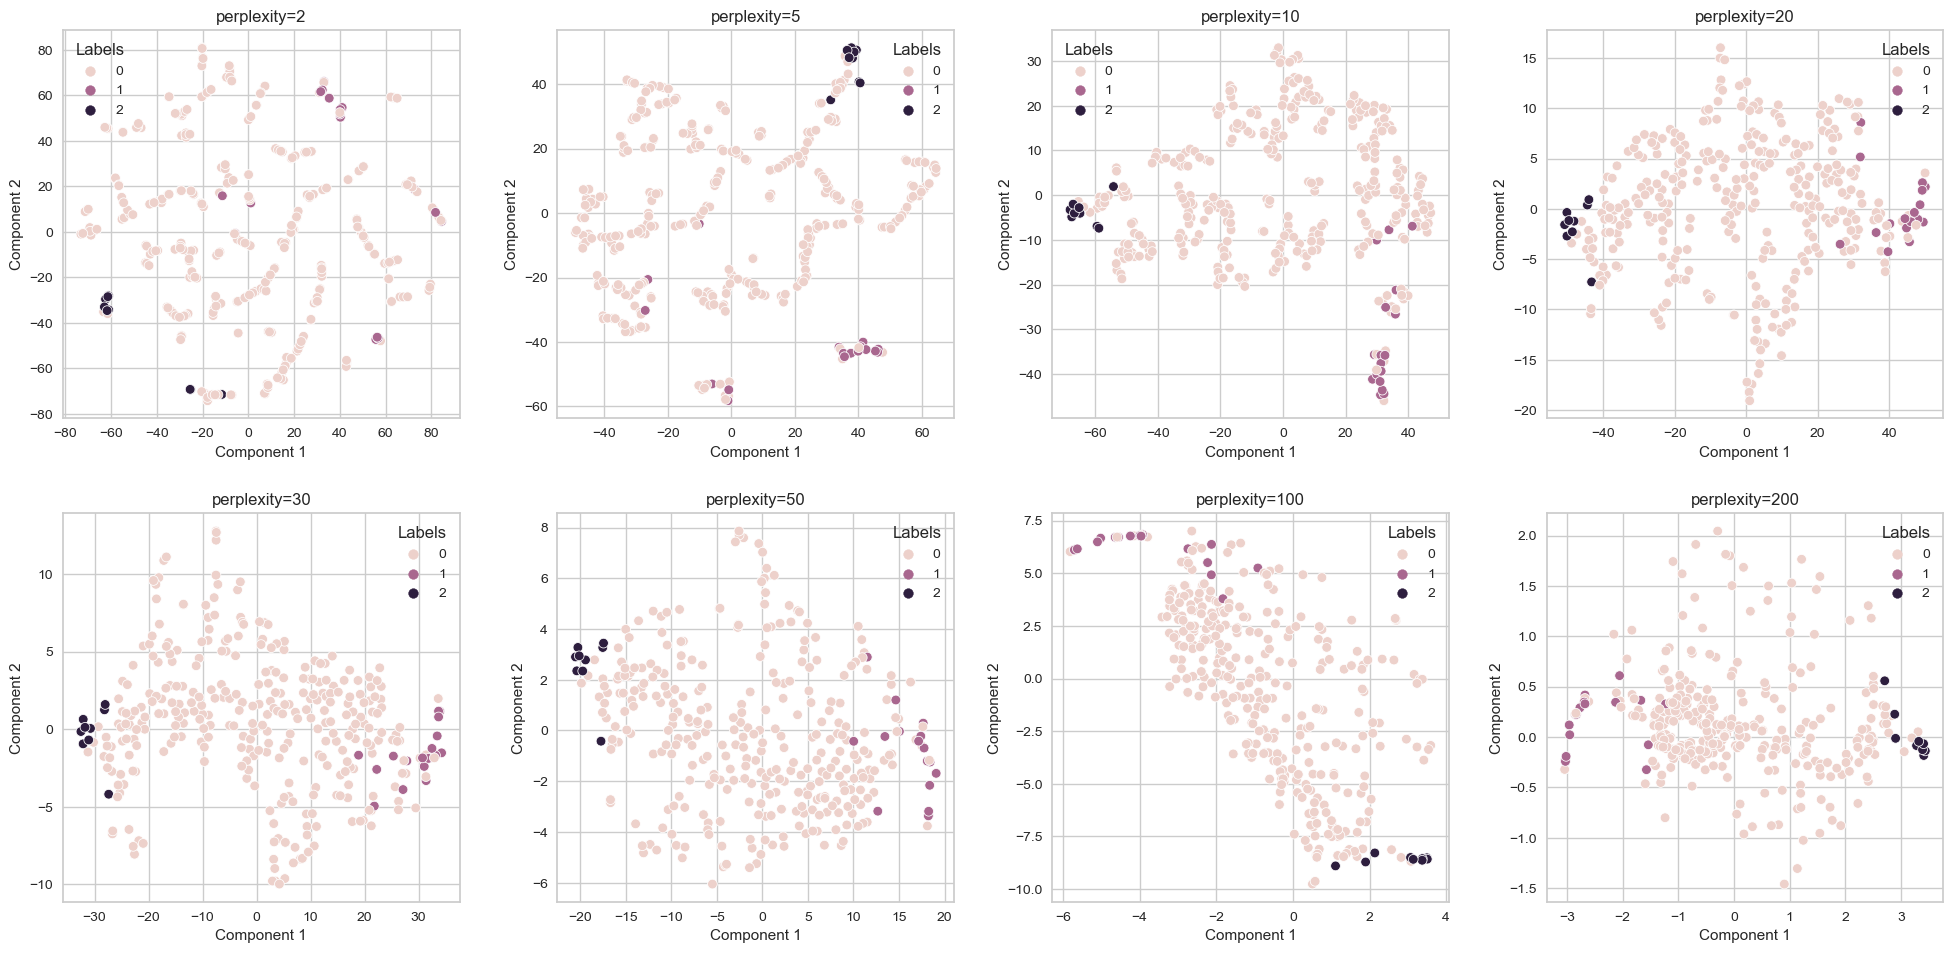

In [684]:
perplexity = [2, 5, 10, 20, 30, 50, 100, 200]

plt.figure(figsize=(20, 10))
print(
    "Visualizing the lower dimensional representation of data for different values of perplexity"
)

for i in range(len(perplexity)):
    tsne = TSNE(n_components=2, perplexity=perplexity[i], n_jobs=-2, random_state=1)
    # n_jobs specifies the number of parallel jobs to run
    # -2 means using all processors except one
    X_red = tsne.fit_transform(Agglomerative_final)

    red_data_df = pd.DataFrame(data=X_red, columns=["Component 1", "Component 2"])

    plt.subplot(2, int(len(perplexity) / 2), i + 1)

    plt.title("perplexity=" + str(perplexity[i]))
    sns.scatterplot(data=red_data_df, x="Component 1", y="Component 2", hue=Agglomerative_final["Labels"]),
    plt.tight_layout(pad=2)

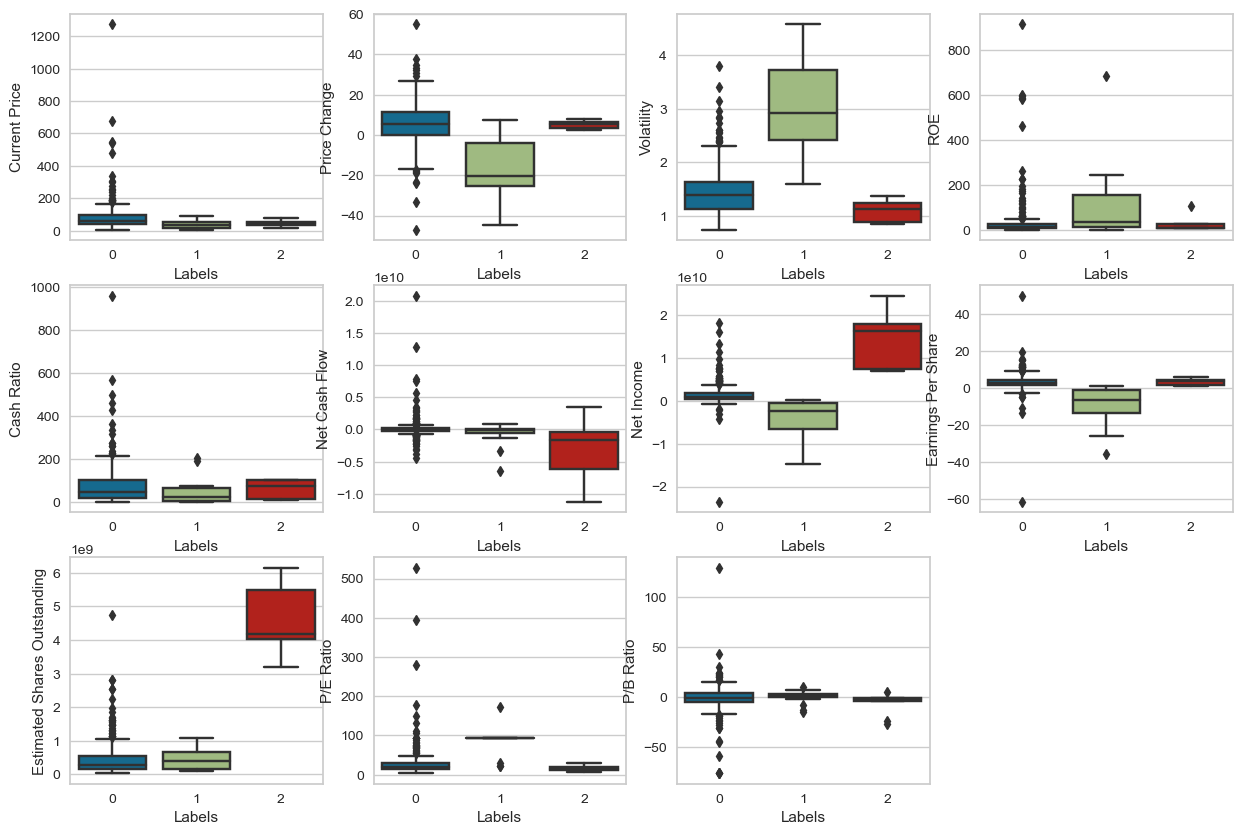

In [685]:
plt.figure(figsize=(15,10))
for i,var in enumerate (num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(Agglomerative_final,x="Labels",y=var)
    

## K-means vs Hierarchical Clustering

You compare several things, like:
- ***Which clustering technique took less time for execution?***
* The Agglomerative Technique took less time to get number of cluster, Where as the in K-Mean the determining the k values is slightly challenge, But the k-means has its's advantage to performance in the any data set.

- ***Which clustering technique gave you more distinct clusters, or are they the same?***
- The distance for the k-mean use the silhouette score 0.5414366069113672 and use the euclidean as the distance where as the Hierarchical use the different distance matrix The final result that we got is euclidean distance and the ward as the linkage 0.7497369342417632

- ***How many observations are there in the similar clusters of both algorithms?***
- For the k-mean cluster we got 2 cluster whereas for the Hierachical cluster with ward linkage we got 3 cluster but with single linkage we got 2 cluster 

- ***How many clusters are obtained as the appropriate number of clusters from both algorithms?***
- With both we got 2 clusters in the k-mean which are Risk free and more Risk, Whereas with heirachical clustering we got 3 cluster which are Risk free, medium Risk and less Risk 
You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

In [686]:
k_cluster_result

In [687]:
Agglomerative_final_result

## Actionable Insights and Recommendations
#### K-Means clustering 
***Cluster0***
- Is a Risk free stock. 
- Current price is highy and price changes is in the positive direction 
- It has less Volatility, which effects the stock for the sudden price drop or sudden price change.
- The cashratio,net-cash-flow and earningsperShare are stable which are primary factor for the risk free stock 
- GICS Sector,GICS Sub Industry are the categorical feature that also had a significent share of the data.
- ***Cluster1***
- Is a Risk stock. 
- Current price is highy and price changes is in the negitive direction 
- It has high Volatility, which effects the stock for the sudden price drop or sudden price change.
- The cashratio,net-cash-flow and earningsperShare are not stable which are primary factor for the risk stock 
- GICS Sector,GICS Sub Industry are the categorical feature that also had a significent negitive impact in the share.
#### Heirarchical-Clustering
***Cluster0***
- Is a Risk free stock. 
- Current price is highy and price changes is in the positive direction 
- It has less Volatility, which effects the stock for the sudden price drop or sudden price change.
- The cashratio,net-cash-flow and earningsperShare are stable which are primary factor for the risk free stock 
- GICS Sector,GICS Sub Industry are the categorical feature that also had a significent share of the data.
- ***Cluster2***
- cluster2 is a moderate rick stocks 
- These are almost similar to the cluster1 except the netcashflow and P/B Ratio 
- ***Cluster1***
- Is a Risk stock. 
- Current price is highy and price changes is in the negitive direction 
- It has high Volatility, which effects the stock for the sudden price drop or sudden price change.
- The cashratio,net-cash-flow and earningsperShare are not stable which are primary factor for the risk stock 
- GICS Sector,GICS Sub Industry are the categorical feature that also had a significent negitive impact in the share.

## Recommendations 
- The stock with NetCashFlow,NetIncome,EarningsPerShare,EstimatedSharesOutstanding are the primary factor to verify before investing
- The Volatility is the secound major factor Volatility is direct propotion to risk or bad stock 
- P/E Ratio	P/B Ratio should be low for good stock 
- There should be more provided for example( This is a 13 week data atleast year data whould give more info on the stock). This is because there would be any recent stocks just went to public.


## PCA and TSNE

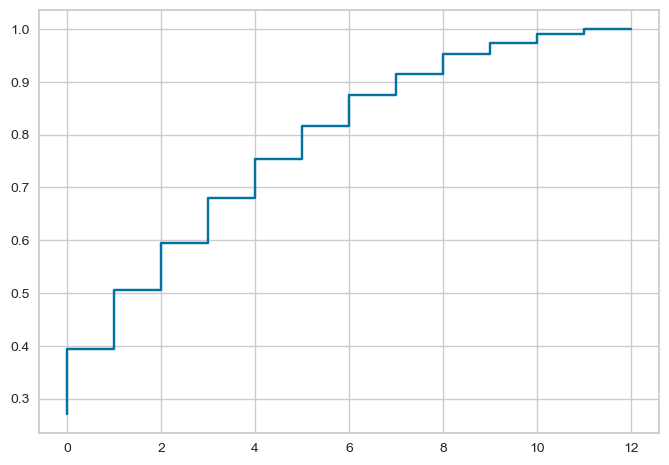

In [688]:
pca =PCA(n_components=13,random_state=1)
model=pca.fit_transform(Scaling_data_df)
checking_pca = pd.DataFrame(model,columns=Scaling_data_df.columns)
plt.step(np.arange(0,13),np.cumsum(pca.explained_variance_ratio_))

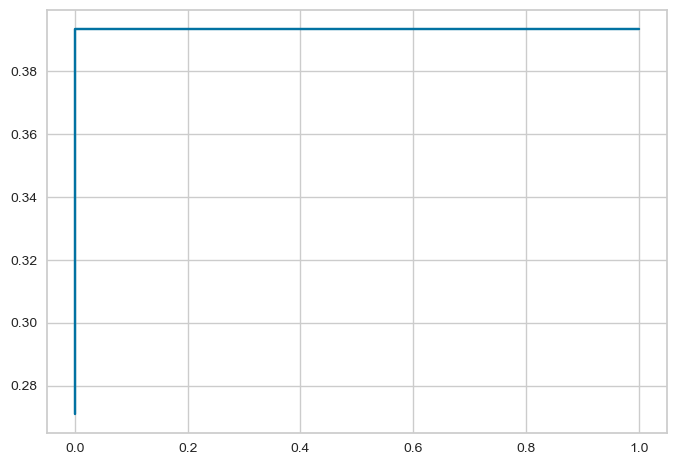

In [689]:
pca =PCA(n_components=2,random_state=1)
model=pca.fit_transform(Scaling_data_df)
checking_pca = pd.DataFrame(model,columns=["comp_1","comp_2"])
plt.step(np.arange(0,2),np.cumsum(pca.explained_variance_ratio_))

In [690]:
np.cumsum(pca.explained_variance_ratio_)

array([0.27096417, 0.39341337])

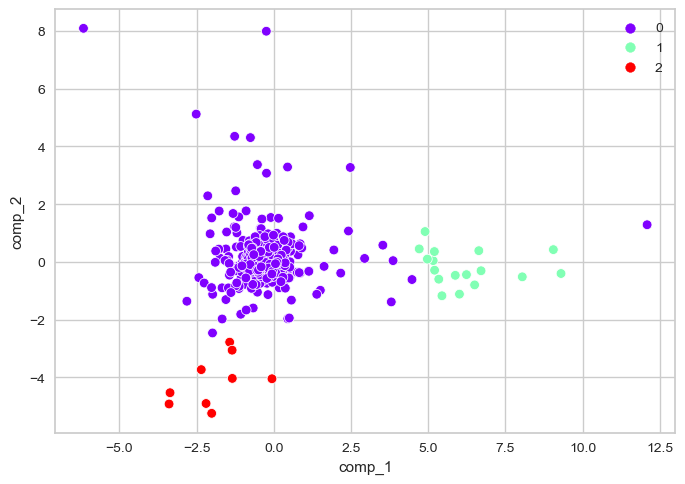

In [691]:
sns.scatterplot(
    data=checking_pca,
    x="comp_1",
    y="comp_2",
    hue=Agglomerative_final["Labels"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

Visualizing the lower dimensional representation of data for different values of perplexity


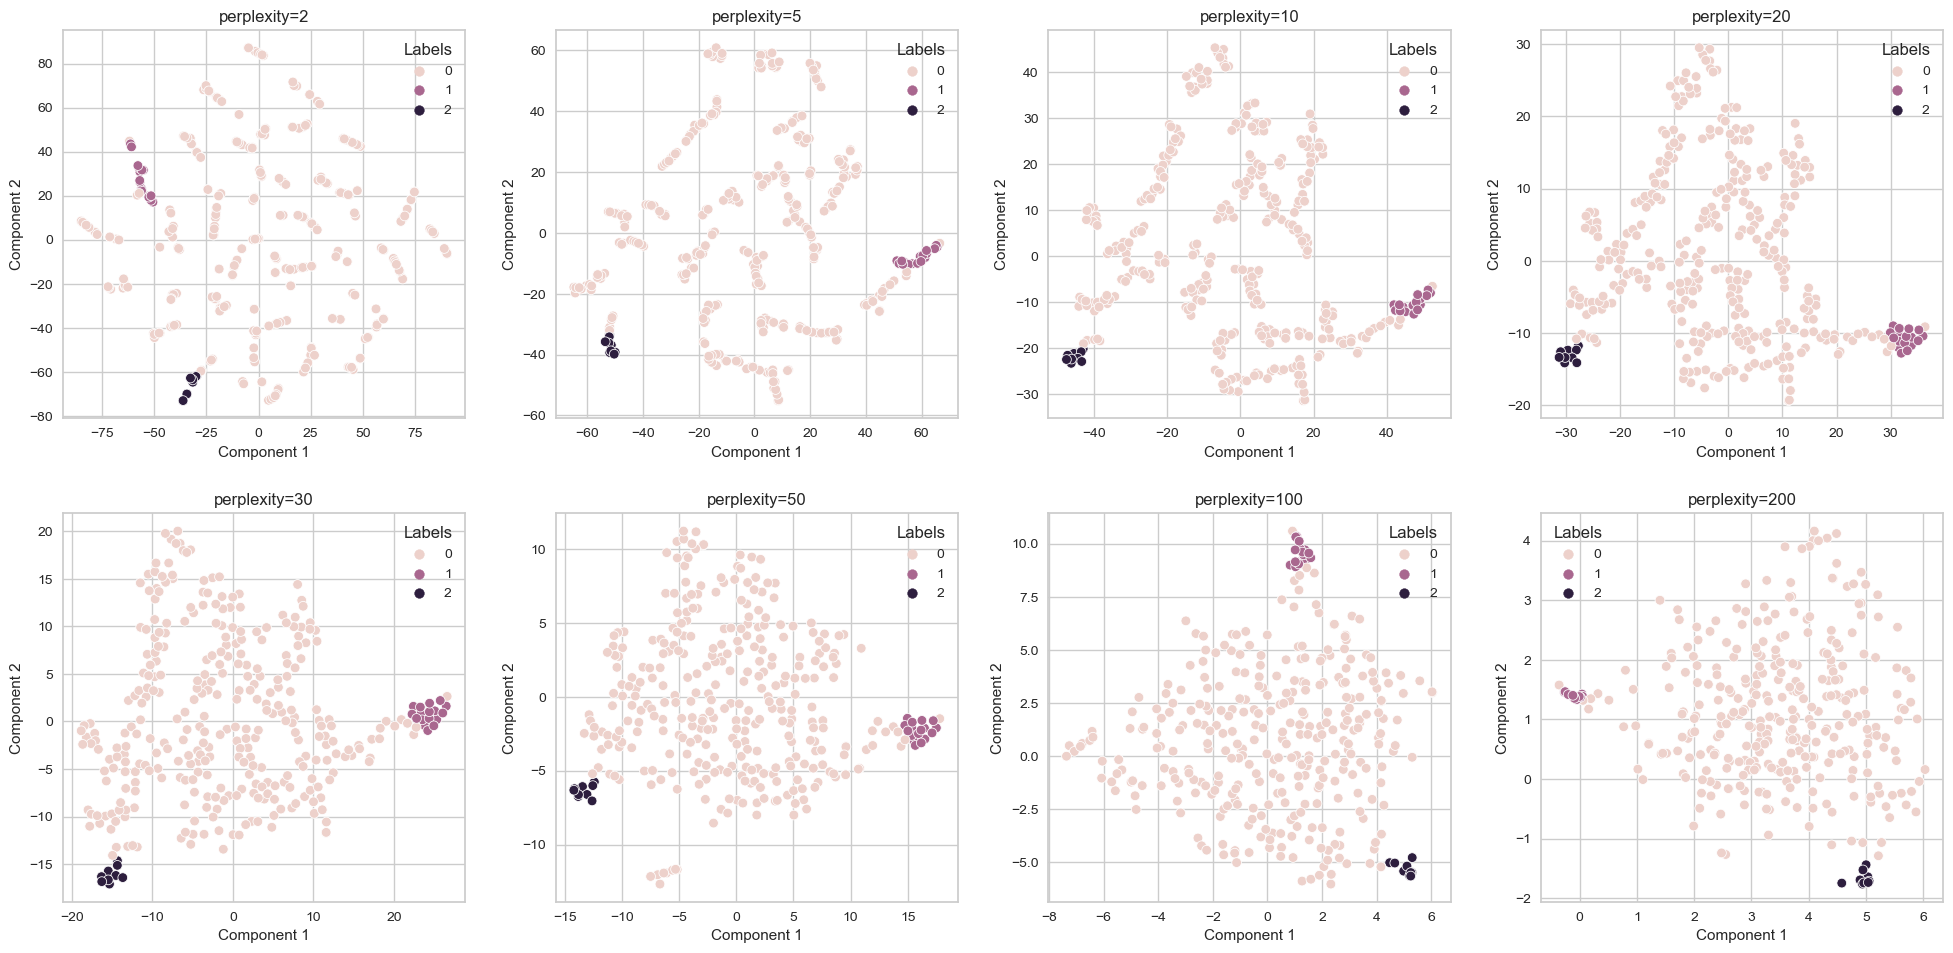

In [692]:
perplexity = [2, 5, 10, 20, 30, 50, 100, 200]

plt.figure(figsize=(20, 10))
print(
    "Visualizing the lower dimensional representation of data for different values of perplexity"
)

for i in range(len(perplexity)):
    tsne = TSNE(n_components=2, perplexity=perplexity[i], n_jobs=-2, random_state=1)
    # n_jobs specifies the number of parallel jobs to run
    # -2 means using all processors except one
    X_red = tsne.fit_transform(checking_pca)

    red_data_df = pd.DataFrame(data=X_red, columns=["Component 1", "Component 2"])

    plt.subplot(2, int(len(perplexity) / 2), i + 1)

    plt.title("perplexity=" + str(perplexity[i]))
    sns.scatterplot(data=red_data_df, x="Component 1", y="Component 2", hue=Agglomerative_final["Labels"]),
    plt.tight_layout(pad=2)

***Observation***
- There is a large cluster and 2 small cluster 
- There is because the there are very few stock whic are very high Volatility. 

## Taking the K-mean clustering data-set for the classification problem 

In [704]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score,train_test_split,StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier


In [699]:
X=Kmean_clustering.drop("Labels",axis=1)
Y=Kmean_clustering["Labels"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1,stratify=Y,test_size=0.30)
stand_scale=StandardScaler()
x_train_scaling=stand_scale.fit_transform(x_train)
x_test_scaling=stand_scale.transform(x_test)

In [721]:
model =[]
model.append(("Dtree",DecisionTreeClassifier()))
model.append(("Rforest",RandomForestClassifier(random_state=1)))
model.append(("Bagging",BaggingClassifier(random_state=1)))
model.append(("Adaboost",AdaBoostClassifier(random_state=1)))
model.append(("Gradient",GradientBoostingClassifier(random_state=1)))
model.append(("Xgboost",XGBClassifier(random_state=1)))
name=[]
result=[]
score=[]
# passing the model in the grid search 
kfold=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
ssc_score="recall"
for names,models in model:
    cross_value=cross_val_score(models,x_train_scaling,y_train,cv=kfold,scoring=ssc_score)
    result.append(cross_value)
    name.append(names)
    print(names,cross_value.mean())
for names,models in model:
    models.fit(x_train_scaling,y_train)
    scores=metrics.recall_score(y_test,models.predict(x_test_scaling))
    score.append(scores)
    
    print(names,scores)

Dtree 0.9
Rforest 0.95
Bagging 0.95
Adaboost 0.95
Gradient 0.8833333333333334
Xgboost 0.8833333333333332
Dtree 0.7142857142857143
Rforest 0.8571428571428571
Bagging 0.7142857142857143
Adaboost 0.5714285714285714
Gradient 0.7142857142857143
Xgboost 0.7142857142857143


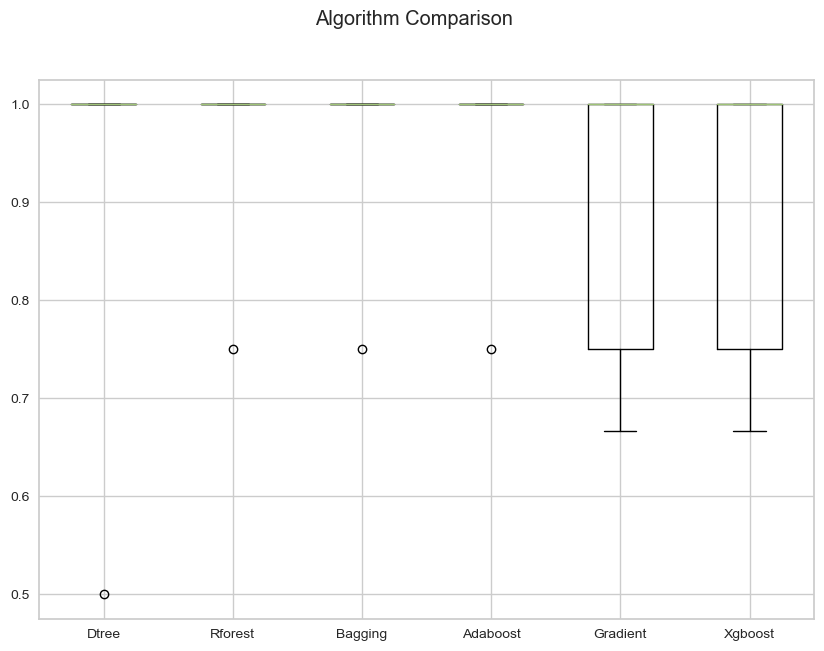

In [725]:
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(result);
ax.set_xticklabels(name);


## OverSampling 

In [734]:
sum(y_train==1),sum(y_train==0)

(16, 222)

In [736]:
os=SMOTE(k_neighbors=5,random_state=1,sampling_strategy=True)
x_train_over,y_train_over=os.fit_resample(x_train_scaling,y_train)

In [738]:
sum(y_train_over==1),sum(y_train_over==0)

(222, 222)

In [746]:
result_1=[]
score_1=[]
for names,models in model:
    cross_scale=cross_val_score(models,x_train_over,y_train_over,cv=kfold,scoring=ssc_score)
    print(names,cross_scale.mean())
    result_1.append(cross_over)
for names,models in model:
    models.fit(x_train_over,y_train_over)
    score_val=metrics.recall_score(y_test,models.predict(x_test_scaling))
    print(names,score_val)
    score_1.append(score_val)
    

Dtree 0.9910101010101011
Rforest 0.9911111111111112
Bagging 0.9911111111111112
Adaboost 1.0
Gradient 0.9954545454545455
Xgboost 0.9911111111111112
Dtree 0.7142857142857143
Rforest 0.8571428571428571
Bagging 0.7142857142857143
Adaboost 0.5714285714285714
Gradient 0.7142857142857143
Xgboost 0.7142857142857143


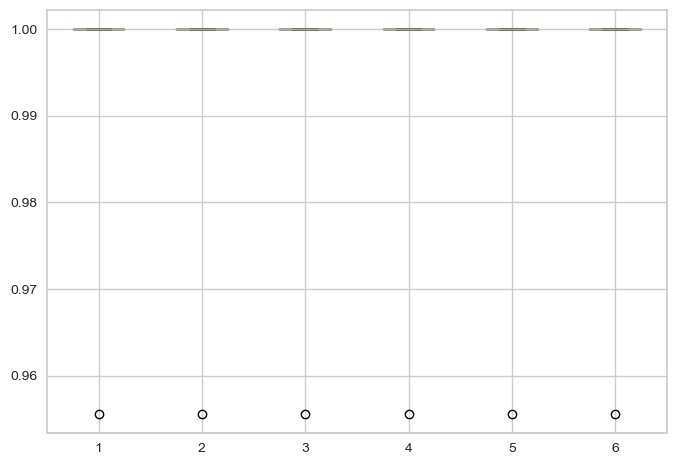

In [748]:
plt.boxplot(result_1);

## Observation 
- Most for the model are giving the same result 
- we are going with the boosting 

In [755]:
estimator = GradientBoostingClassifier(random_state=1)
parameter={
    "loss":["log_loss"],
    "learning_rate":[0.1,0.01,0.001],
    "n_estimators":np.arange(100,200,20),
    "min_samples_split":[2,3,4],
    "min_weight_fraction_leaf":[0.0,0.001],
    "max_depth":np.arange(3,10,1),
    "n_estimators":np.arange(80,150,10)
}
kfold=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
Grid_cv= GridSearchCV(estimator,parameter,cv=kfold,scoring=ssc_score)
Grid_cv.fit(x_train_over,y_train_over)
best_fit=Grid_cv.best_estimator_
best_fit.fit(x_test_scaling,y_test)


GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=80,
                           random_state=1)

In [759]:
def checking_performace(model,predictor,target):
    prec=model.predict(predictor)
    recall=metrics.recall_score(target,prec)
    precision=metrics.precision_score(target,prec)
    f1_score=metrics.f1_score(target,prec)
    accuracy=metrics.accuracy_score(target,prec)
    result =pd.DataFrame({
        "accuracy":accuracy,
        "recall":recall,
        "precision":precision,
        "f1_score":f1_score
    },index=[0])
    return result

In [763]:
checking_performace(best_fit,x_train_over,y_train_over)

accuracy    recall  precision  f1_score
0  0.777027  0.558559      0.992  0.714697

In [764]:
checking_performace(best_fit,x_test_scaling,y_test)

accuracy  recall  precision  f1_score
0       1.0     1.0        1.0       1.0

In [771]:
def confution_matrix(model,prediction,target):
    prec=model.predict(prediction)
    cm=metrics.confusion_matrix(target,prec)
    label=np.asarray([
        ["{0:0.2f}".format(item)+"\n{0:0.2%}".format(item/cm.flatten().sum())]
        for item in cm.flatten()
    ]).reshape(2,2)
    sns.heatmap(cm,annot=label,fmt="")

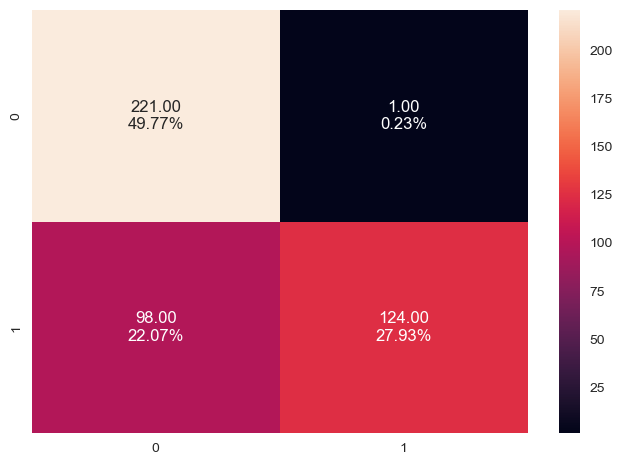

In [772]:
confution_matrix(best_fit,x_train_over,y_train_over)

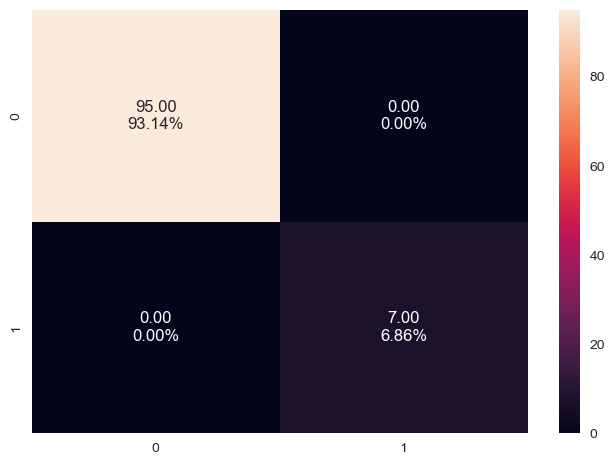

In [773]:
confution_matrix(best_fit,x_test_scaling,y_test)